### **Why data viz is important?**

**Because** you can build plots like this:

<div style="display: flex;">
 <div><img src="../misc/bar.jpg" /></div>
 <div><img src="../misc/line.jpg" /></div>
</div>
<div style="display: flex; width: 100%;">
 <div><img src="../misc/line2.jpg" /></div>
 <div><img src="../misc/pie.jpg" /></div>
</div>

### Data viz is fun:

![](../misc/himym.jpg)

### And also useful

![](../misc/dd.png)

# 📌 Agenda  

## 1. Basic Syntax  
- **1.1** At Least Three Layers  
- **1.2** Main `geom`s  
- **1.3** Main Title & Subtitle  
- **1.4** Axis Labels & Text  

## 2. Beyond the Basics  
- **2.1** Chart Rotation  
- **2.2** Text on the Plot  
- **2.3** Legend Customization  
- **2.4** Faceting  

## 3. Useful Companions to ggplot2  
- **3.1** `scales` (for better axis formatting)

## 4. Saving Charts  
- Exporting and formatting your plots for presentations & reports  


---
---
---

In [157]:
library(tidyverse)
library(readxl)

# giving up scientific notation (1.6e+07)
options(scipen=999, digits=4)

In [158]:
data_path = '../Datasets'

## 1. Basic Syntax  
- **1.1** At Least Three Layers  

The “gg” in ggplot stands for the **“grammar of graphics”** developed by Leland Wilkinson (Wilkinson 2005), and describes the “deep features that underlie all statistical graphics” (Wickham 2016). In essence, it’s a way of thinking about how to create graphs. This all sounds a bit esoteric, so let’s try and be a bit more specific.

Wickham writes:

In brief, the grammar tells us that a statistical graphic is a mapping from **data** to **aesthetic attributes** (colour, shape, size) of **geometric objects** (points, lines, bars). The plot may also contain statistical transformations of the data and is drawn on a specific coordinate system.

Every graph consists of data within a coordinate system with the data being represented by geometric objects (or geoms), like points, lines, or bars. The data that you want to visualize are mapped to aesthetic attributes, like shape, colour, location.


#### So, there are three essential layers  
- **Data (Set)** – The dataset used for visualization.  
- **Aesthetic Mapping** – Defines how data is mapped to visual properties:  
  - **Position** (x and y axes)  
  - **Color** (outline color)  
  - **Fill** (inside color)  
  - **Shape** (of points)  
  - **Linetype**  
  - **Size**  
- **Geoms** – Visual marks that represent data points:  
  - **Points** – `geom_point` (scatter plots, dot plots)
  - **Lines** - `geom_line` 
  - **Boxplot** - `geom_boxplot`

![](../misc/cheatsheet.png)

![](../misc/Kieran.png)

In [160]:
load(file.path(data_path, 'exchange_rates.RData'))

In [161]:
head(exchange_rates)

,Date,AUD,BGN,CAD,CHF,CZK,DKK,EGP,EUR,GBP,⋯,100 KRW,MXN,NZD,RSD,UAH,AED,HRK,THB,XAU,XDR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,02.11.2018,2.9542,2.3837,3.1196,4.0826,0.1806,0.6249,0.2274,4.6621,5.3078,⋯,0.3660,0.2046,2.7230,0.0394,0.1446,1.1090,0.6269,0.1242,161.7815,5.6641
3,01.11.2018,2.9351,2.3846,3.1273,4.0856,0.1804,0.6251,0.2283,4.6639,5.2807,⋯,0.3624,0.2034,2.7097,0.0394,0.1455,1.1162,0.6273,0.1242,161.2711,5.6781
4,31.10.2018,2.9187,2.3861,3.1334,4.0910,0.1802,0.6254,0.2295,4.6668,5.2424,⋯,0.3608,0.2047,2.6914,0.0394,0.1465,1.1201,0.6277,0.1241,161.0916,5.6847
5,30.10.2018,2.9119,2.3859,3.1305,4.0986,0.1804,0.6254,0.2293,4.6665,5.2397,⋯,0.3605,0.2049,2.6885,0.0395,0.1459,1.1184,0.6279,0.1234,161.1900,5.6815
6,29.10.2018,2.9020,2.3840,3.1247,4.0929,0.1805,0.6249,0.2282,4.6628,5.2497,⋯,0.3586,0.2090,2.6780,0.0394,0.1448,1.1134,0.6274,0.1233,161.8035,5.6686
7,26.10.2018,2.8853,2.3842,3.1231,4.1024,0.1802,0.6250,0.2293,4.6630,5.2576,⋯,0.3591,0.2098,2.6575,0.0394,0.1451,1.1181,0.6274,0.1240,163.3246,5.6855


In [162]:
View(exchange_rates)

,Date,AUD,BGN,CAD,CHF,CZK,DKK,EGP,EUR,GBP,⋯,100 KRW,MXN,NZD,RSD,UAH,AED,HRK,THB,XAU,XDR
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,02.11.2018,2.9542,2.3837,3.1196,4.0826,0.1806,0.6249,0.2274,4.6621,5.3078,⋯,0.3660,0.2046,2.7230,0.0394,0.1446,1.1090,0.6269,0.1242,161.7815,5.6641
3,01.11.2018,2.9351,2.3846,3.1273,4.0856,0.1804,0.6251,0.2283,4.6639,5.2807,⋯,0.3624,0.2034,2.7097,0.0394,0.1455,1.1162,0.6273,0.1242,161.2711,5.6781
4,31.10.2018,2.9187,2.3861,3.1334,4.0910,0.1802,0.6254,0.2295,4.6668,5.2424,⋯,0.3608,0.2047,2.6914,0.0394,0.1465,1.1201,0.6277,0.1241,161.0916,5.6847
5,30.10.2018,2.9119,2.3859,3.1305,4.0986,0.1804,0.6254,0.2293,4.6665,5.2397,⋯,0.3605,0.2049,2.6885,0.0395,0.1459,1.1184,0.6279,0.1234,161.1900,5.6815
6,29.10.2018,2.9020,2.3840,3.1247,4.0929,0.1805,0.6249,0.2282,4.6628,5.2497,⋯,0.3586,0.2090,2.6780,0.0394,0.1448,1.1134,0.6274,0.1233,161.8035,5.6686
7,26.10.2018,2.8853,2.3842,3.1231,4.1024,0.1802,0.6250,0.2293,4.6630,5.2576,⋯,0.3591,0.2098,2.6575,0.0394,0.1451,1.1181,0.6274,0.1240,163.3246,5.6855
8,25.10.2018,2.8927,2.3837,3.1386,4.0932,0.1804,0.6249,0.2281,4.6622,5.2707,⋯,0.3595,0.2092,2.6650,0.0393,0.1441,1.1123,0.6275,0.1242,161.9311,5.6674
9,24.10.2018,2.8935,2.3821,3.1182,4.0919,0.1805,0.6245,0.2278,4.6590,5.2742,⋯,0.3603,0.2117,2.6731,0.0393,0.1442,1.1108,0.6272,0.1241,161.4971,5.6611
10,23.10.2018,2.8801,2.3862,3.1040,4.0897,0.1808,0.6256,0.2269,4.6670,5.2812,⋯,0.3578,0.2099,2.6677,0.0394,0.1447,1.1070,0.6282,0.1238,161.4068,5.6548


In [163]:
names(exchange_rates)

[1] "Date"    "AUD"     "BGN"     "CAD"     "CHF"     "CZK"     "DKK"    
 [8] "EGP"     "EUR"     "GBP"     "100 HUF" "100 JPY" "MDL"     "NOK"    
[15] "PLN"     "RUB"     "SEK"     "TRY"     "USD"     "ZAR"     "BRL"    
[22] "CNY"     "INR"     "100 KRW" "MXN"     "NZD"     "RSD"     "UAH"    
[29] "AED"     "HRK"     "THB"     "XAU"     "XDR"

In [164]:
glimpse(exchange_rates)

Rows: 10
Columns: 33
$ Date      <chr> "02.11.2018", "01.11.2018", "31.10.2018", "30.10.2018", "29.…
$ AUD       <chr> "2.9542", "2.9351", "2.9187", "2.9119", "2.9020", "2.8853", …
$ BGN       <chr> "2.3837", "2.3846", "2.3861", "2.3859", "2.3840", "2.3842", …
$ CAD       <chr> "3.1196", "3.1273", "3.1334", "3.1305", "3.1247", "3.1231", …
$ CHF       <chr> "4.0826", "4.0856", "4.0910", "4.0986", "4.0929", "4.1024", …
$ CZK       <chr> "0.1806", "0.1804", "0.1802", "0.1804", "0.1805", "0.1802", …
$ DKK       <chr> "0.6249", "0.6251", "0.6254", "0.6254", "0.6249", "0.6250", …
$ EGP       <chr> "0.2274", "0.2283", "0.2295", "0.2293", "0.2282", "0.2293", …
$ EUR       <chr> "4.6621", "4.6639", "4.6668", "4.6665", "4.6628", "4.6630", …
$ GBP       <chr> "5.3078", "5.2807", "5.2424", "5.2397", "5.2497", "5.2576", …
$ `100 HUF` <chr> "1.4474", "1.4416", "1.4366", "1.4365", "1.4376", "1.4377", …
$ `100 JPY` <chr> "3.6096", "3.6289", "3.6356", "3.6414", "3.6445", "3.6696", …
$ MDL       <chr> "

In [165]:
str(exchange_rates)

'data.frame':	10 obs. of  33 variables:
 $ Date   : chr  "02.11.2018" "01.11.2018" "31.10.2018" "30.10.2018" ...
 $ AUD    : chr  "2.9542" "2.9351" "2.9187" "2.9119" ...
 $ BGN    : chr  "2.3837" "2.3846" "2.3861" "2.3859" ...
 $ CAD    : chr  "3.1196" "3.1273" "3.1334" "3.1305" ...
 $ CHF    : chr  "4.0826" "4.0856" "4.0910" "4.0986" ...
 $ CZK    : chr  "0.1806" "0.1804" "0.1802" "0.1804" ...
 $ DKK    : chr  "0.6249" "0.6251" "0.6254" "0.6254" ...
 $ EGP    : chr  "0.2274" "0.2283" "0.2295" "0.2293" ...
 $ EUR    : chr  "4.6621" "4.6639" "4.6668" "4.6665" ...
 $ GBP    : chr  "5.3078" "5.2807" "5.2424" "5.2397" ...
 $ 100 HUF: chr  "1.4474" "1.4416" "1.4366" "1.4365" ...
 $ 100 JPY: chr  "3.6096" "3.6289" "3.6356" "3.6414" ...
 $ MDL    : chr  "0.2388" "0.2401" "0.2400" "0.2390" ...
 $ NOK    : chr  "0.4898" "0.4898" "0.4882" "0.4893" ...
 $ PLN    : chr  "1.0780" "1.0783" "1.0772" "1.0781" ...
 $ RUB    : chr  "0.0620" "0.0625" "0.0626" "0.0626" ...
 $ SEK    : chr  "0.4519" "0.452

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 1:</b>
  <div>Draw a plot with the evolution (by dates - `Date`) of exchange rate for EUR (`EUR`)</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

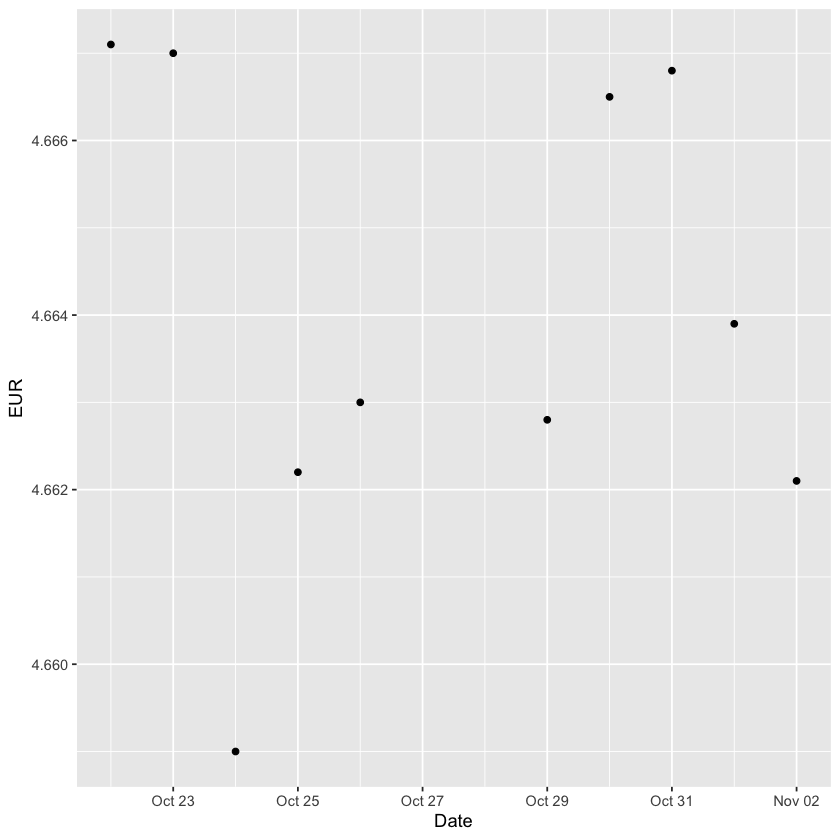

In [129]:
ggplot(
  # data
  exchange_rates %>%
    mutate (
      Date = lubridate::dmy(Date),
      EUR = as.numeric(EUR)
   ),
   # aestetics
   aes (x = Date, y = EUR)
  ) +
  # `geom`s
  geom_point()


<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  Is it understandable? Is the visual representation appropriate?
</div>

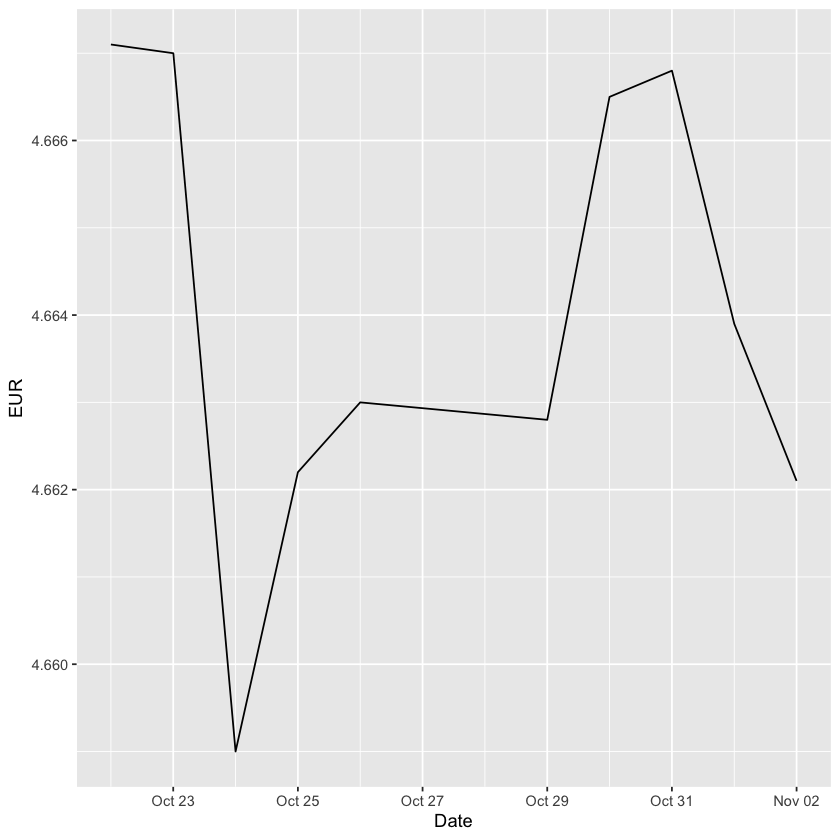

In [37]:
ggplot(
  # data
  exchange_rates %>%
    mutate (
      Date = lubridate::dmy(Date),
      EUR = as.numeric(EUR)
    ),     
  # aestetics
  aes (x = Date, y = EUR)
  ) +
  # `geom`s
  geom_line()


<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  Better? 
</div>

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 2:</b>
  <div> Draw a plot with the comparative evolution (by dates - `Date`) of exchange rate for EUR, USD and GBP
  </div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 1:</div>

In [131]:
data <- exchange_rates %>%
     transmute (Date = lubridate::dmy(Date), EUR, USD, GBP) %>%
     mutate_if(is.character, as.numeric)
glimpse(data)

Rows: 10
Columns: 4
$ Date <date> 2018-11-02, 2018-11-01, 2018-10-31, 2018-10-30, 2018-10-29, 2018…
$ EUR  <dbl> 4.662, 4.664, 4.667, 4.667, 4.663, 4.663, 4.662, 4.659, 4.667, 4.…
$ USD  <dbl> 4.073, 4.100, 4.114, 4.108, 4.090, 4.107, 4.086, 4.080, 4.066, 4.…
$ GBP  <dbl> 5.308, 5.281, 5.242, 5.240, 5.250, 5.258, 5.271, 5.274, 5.281, 5.…


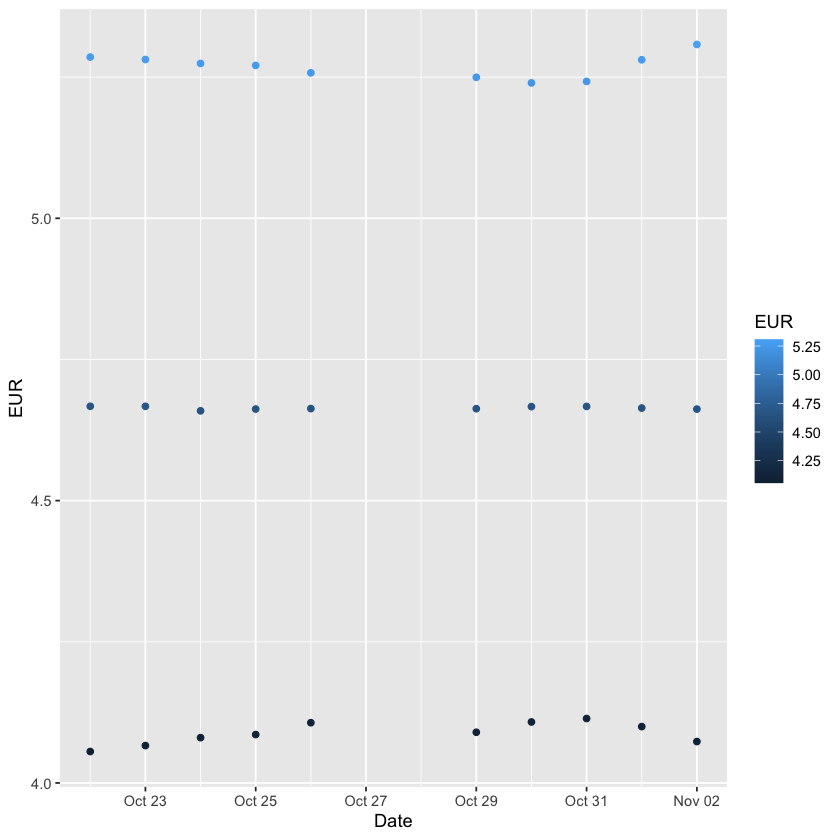

In [132]:
ggplot(
  # the data source
  data,
  # general `aestetics``
  aes (x = Date)
  ) +
  # geoms
  geom_point(aes (y = EUR, colour = EUR)) +  # `geom` for EUR
  geom_point(aes (y = USD, colour = USD) ) + # `geom` for USD
  geom_point(aes (y = GBP, colour = GBP) )  # `geom` for GBP



<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  Can you really say what's this graphic about? Are colors good?
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Updated Solution 1:</div>

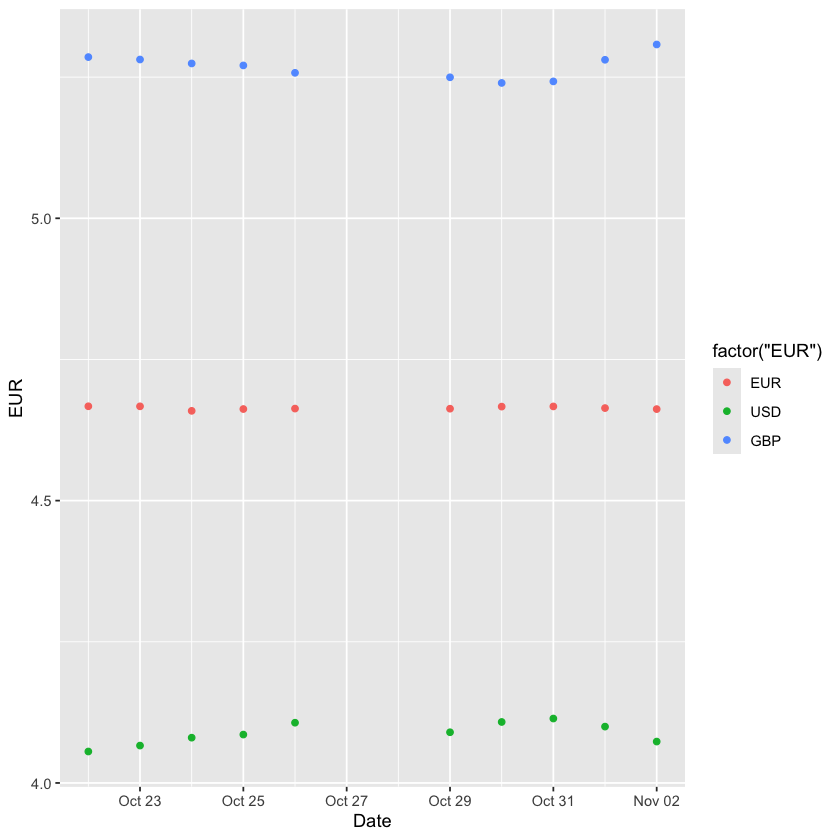

In [41]:
ggplot(
  # the data source
  data,
  # general `aestetics``
  aes (x = Date )
  ) +  
  # geoms
  geom_point(aes (y = EUR, colour = factor('EUR'))) +  # `geom` for EUR
  geom_point(aes (y = USD, colour = factor('USD'))) + # `geom` for USD
  geom_point(aes (y = GBP, colour = factor('GBP')))  # `geom` for GBP


<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  Better, still not good enough
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 2: transform data from `wider` to `longer` format and use `color` aestetic</div>

In [166]:
data = exchange_rates %>%
     transmute (Date = lubridate::dmy(Date), EUR, USD, GBP) %>%
     mutate_if(is.character, as.numeric) %>%
     pivot_longer(-Date, names_to = 'currency', values_to = "exchange_rate") %>%
     mutate(currency = factor(currency))
glimpse(data)

Rows: 30
Columns: 3
$ Date          <date> 2018-11-02, 2018-11-02, 2018-11-02, 2018-11-01, 2018-11…
$ currency      <fct> EUR, USD, GBP, EUR, USD, GBP, EUR, USD, GBP, EUR, USD, G…
$ exchange_rate <dbl> 4.662, 4.073, 5.308, 4.664, 4.100, 5.281, 4.667, 4.114, …


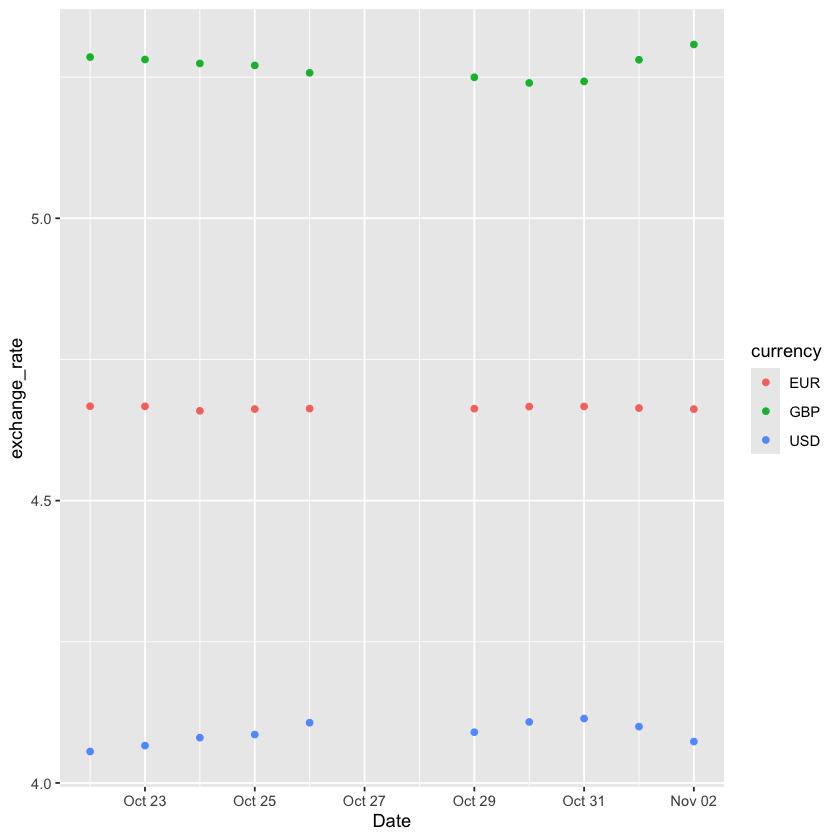

In [44]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency )
  ) +
  # a single `geom`
  geom_point()       


<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  Got the same plot, but the legend is better now
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 3: facet_wrap (using the same transformed data)</div>

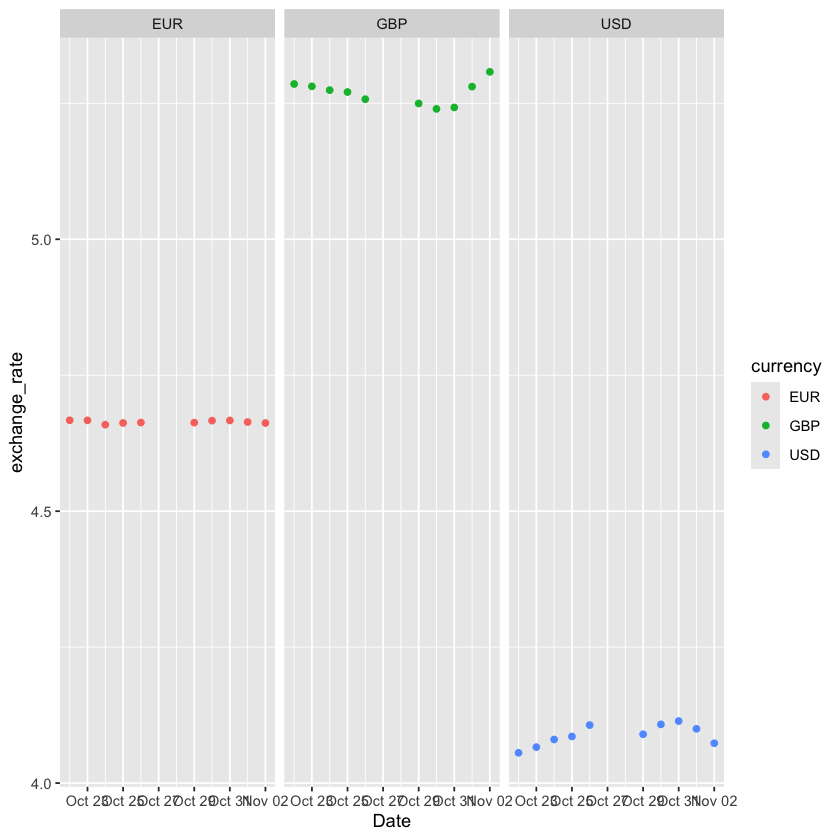

In [45]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) +
  # a single `geom`
  geom_point() +
  # display each currency in a separate panel
  facet_wrap( ~ currency)   

**1.2** Main `geom`s  

![](../misc/geoms.png)

In [167]:
data <- exchange_rates %>%
     transmute (Date = lubridate::dmy(Date), EUR, USD, GBP) %>%
     mutate_if(is.character, as.numeric) %>%
     pivot_longer(-Date, names_to = 'currency', values_to = "exchange_rate") %>%
     mutate(currency = factor(currency))
glimpse(data)

Rows: 30
Columns: 3
$ Date          <date> 2018-11-02, 2018-11-02, 2018-11-02, 2018-11-01, 2018-11…
$ currency      <fct> EUR, USD, GBP, EUR, USD, GBP, EUR, USD, GBP, EUR, USD, G…
$ exchange_rate <dbl> 4.662, 4.073, 5.308, 4.664, 4.100, 5.281, 4.667, 4.114, …


### Line

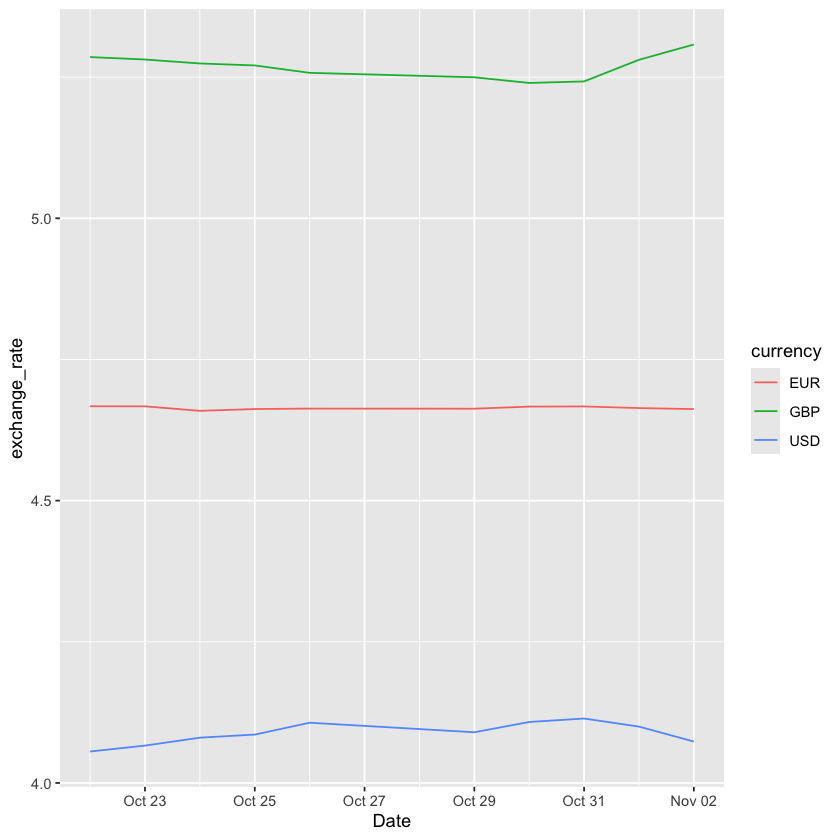

In [135]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) +
  # `geom` for a line plot
  geom_line()   

### Col

In [169]:
data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate))

currency,mean_rate
<fct>,<dbl>
EUR,4.664
GBP,5.269
USD,4.088


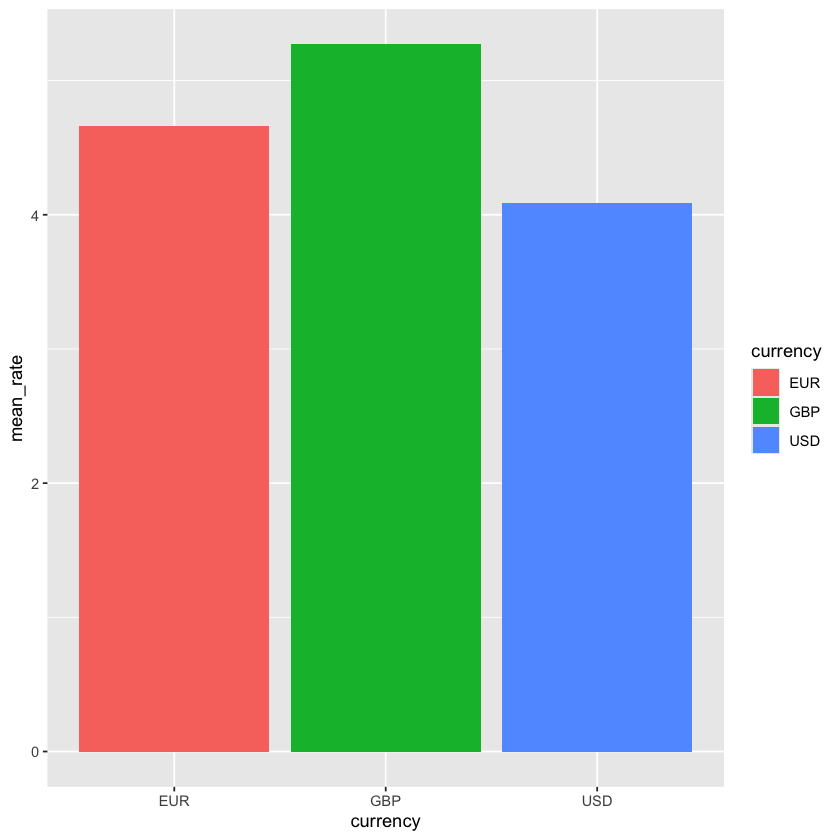

In [50]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_col()

### Bar

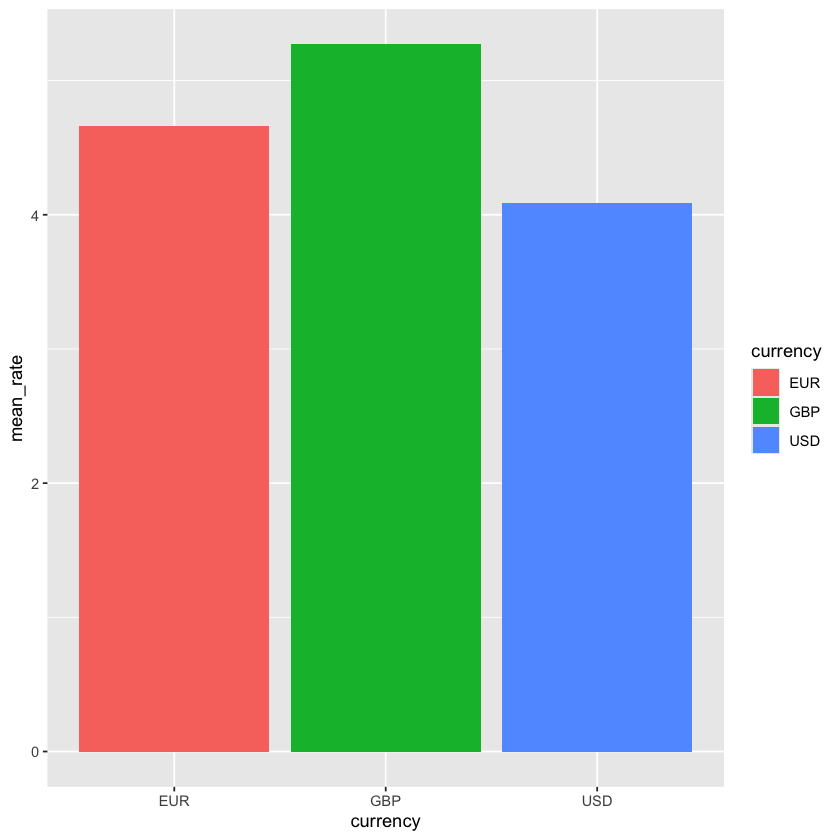

In [51]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)) %>%
    ungroup(),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity")


### Histogram

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


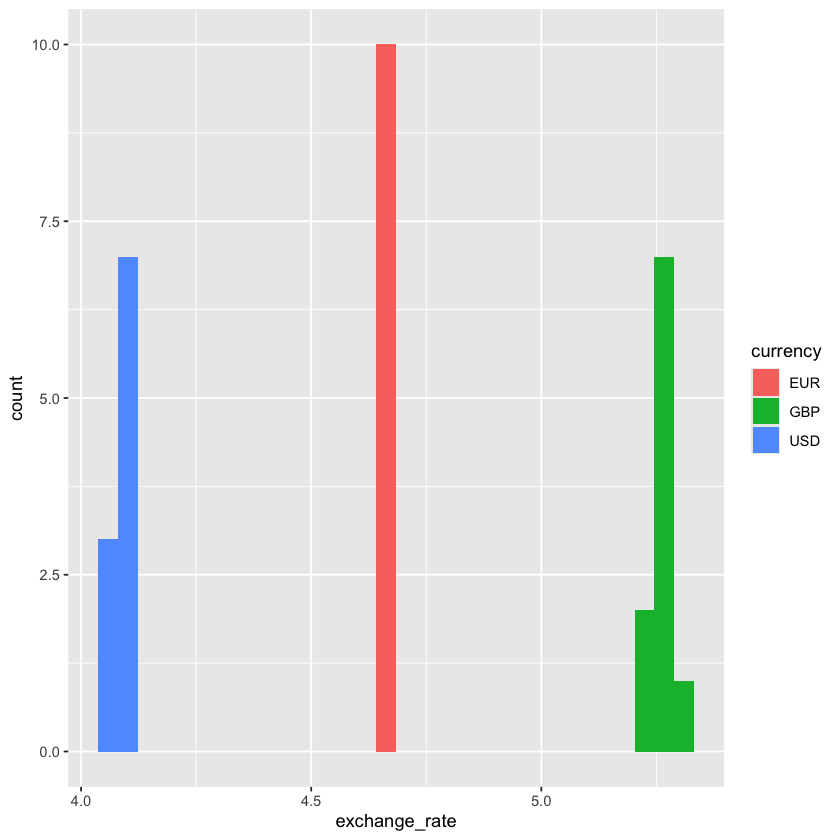

In [170]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_histogram() # `transparency/translucency`  

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


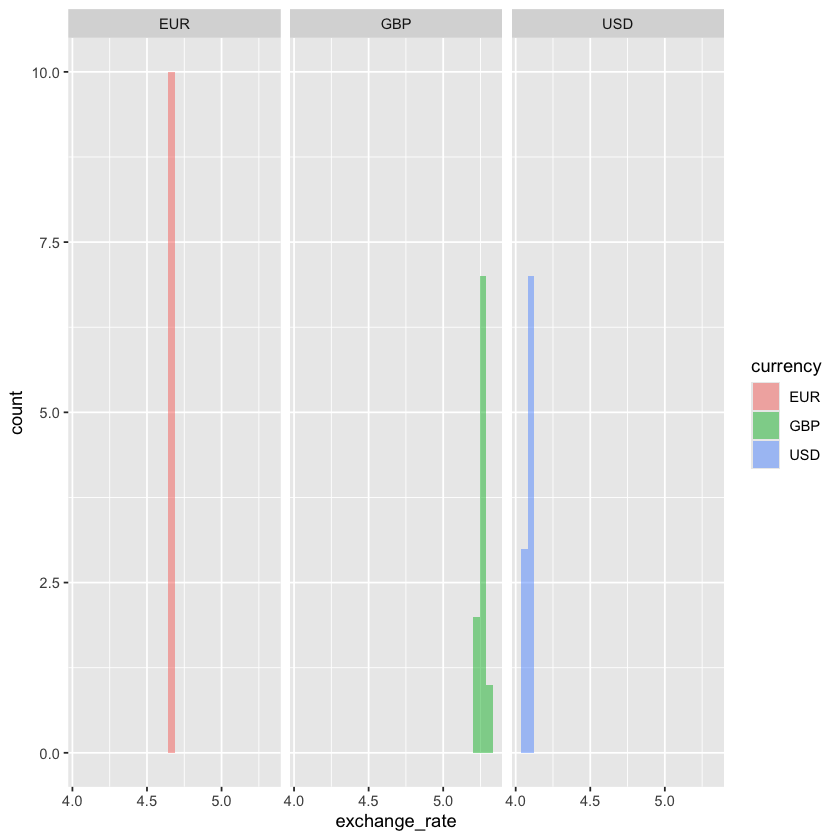

In [53]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_histogram(alpha = 0.5) + #  `alpha` is for setting the "transparency/translucency"
  facet_wrap( ~ currency)

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


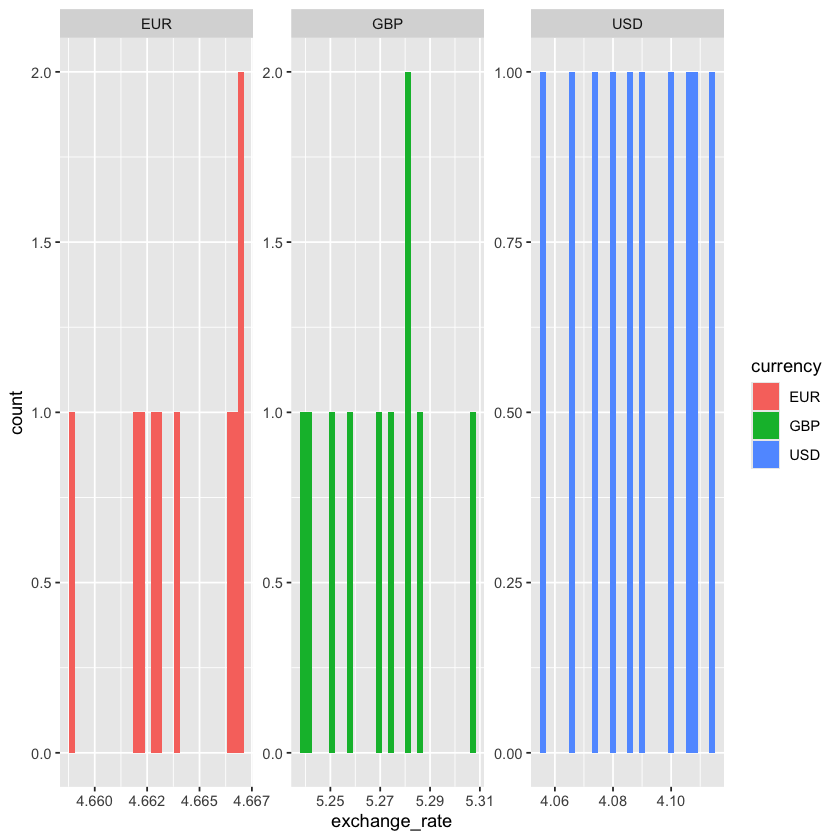

In [54]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_histogram()   +
  facet_wrap( ~ currency, scales = 'free')

### Density

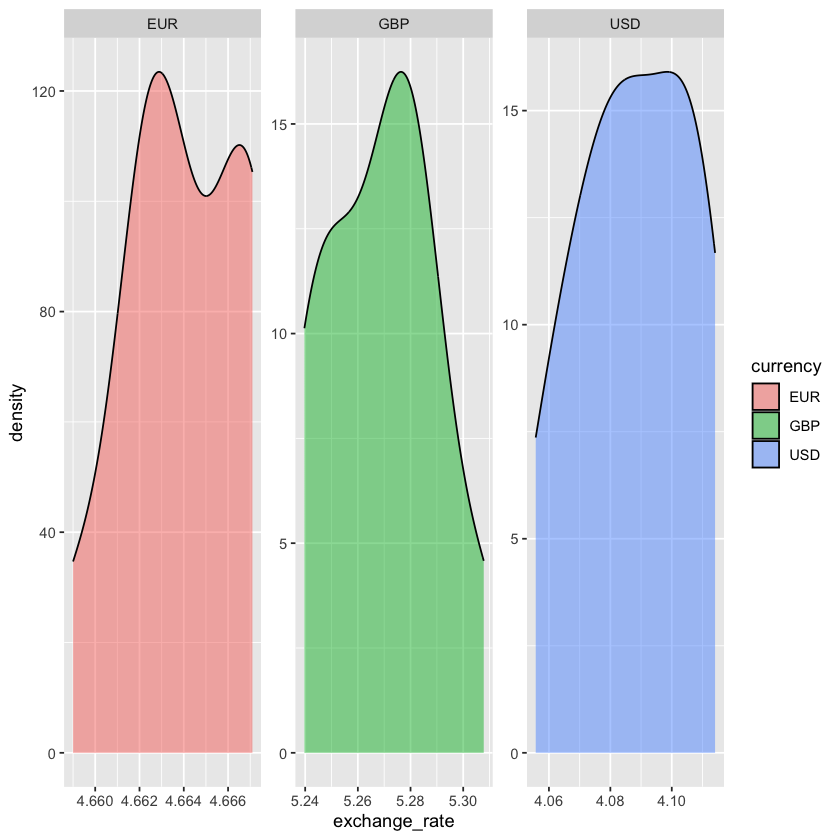

In [141]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_density(alpha = 0.5)   +
  facet_wrap( ~ currency, scales = 'free')


### Boxplot

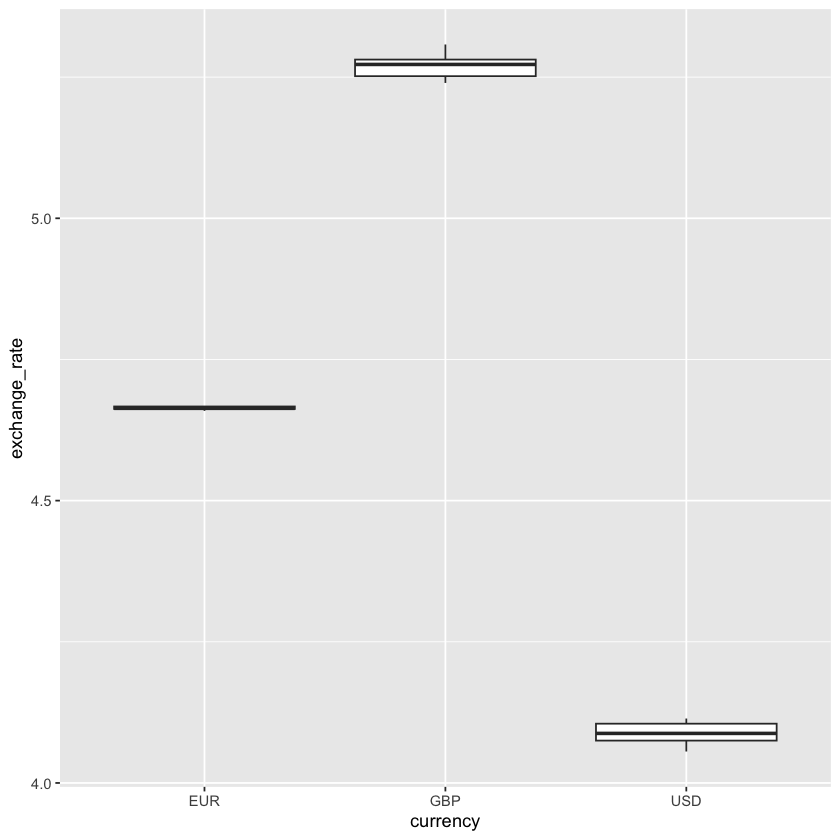

In [142]:
ggplot(
  data,
  aes (x = currency, y = exchange_rate)
  ) +
  geom_boxplot()


### Point

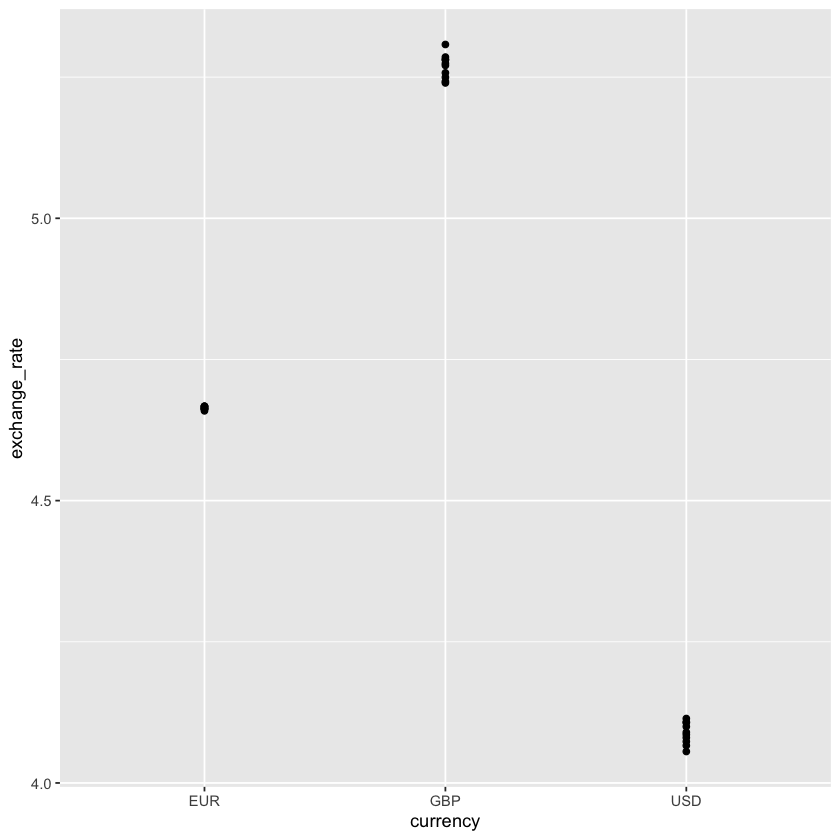

In [143]:
ggplot(
  data,
  aes (x = currency, y = exchange_rate)
  ) +
  geom_point()

**1.3** Main title and the subtitle 

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 3:</b>
  <div> Draw a line plot for exchange rates and add the plot title and subtitle</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 1: using ggtitle</div>

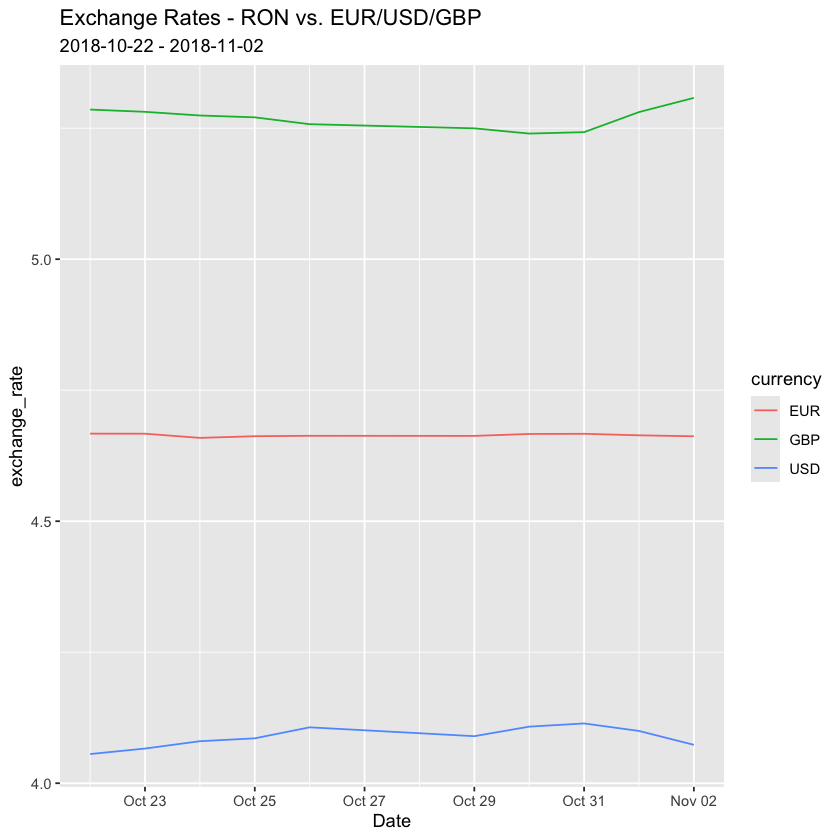

In [58]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) +
  # `geom` for a line plot
  geom_line() +
  ggtitle(
    "Exchange Rates - RON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - ')
  )

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 2: using labs</div>

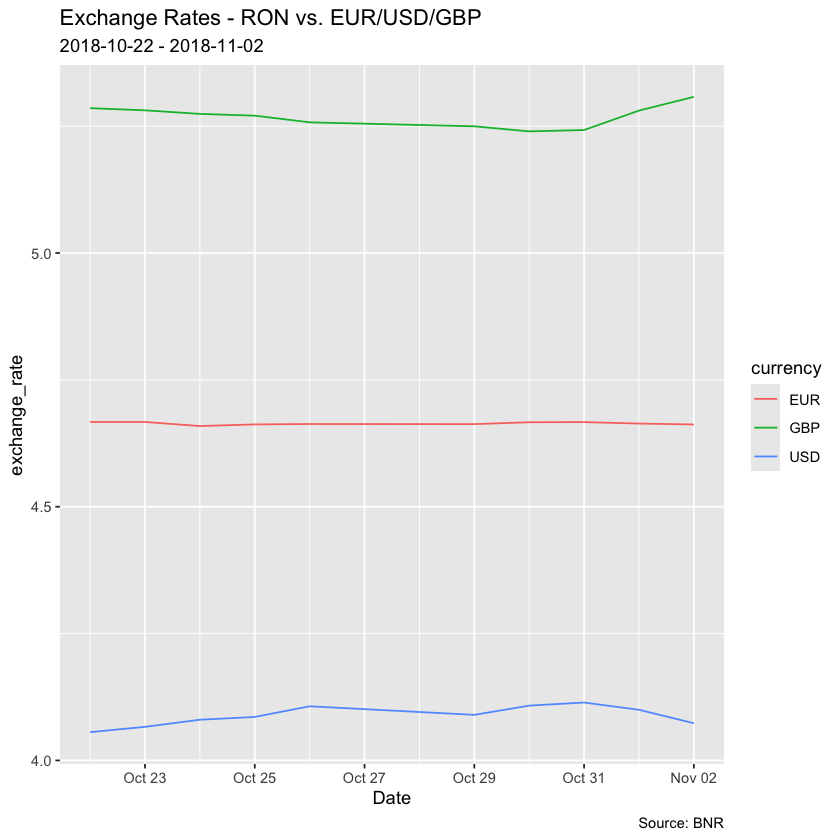

In [59]:
ggplot(
  # the data source
  data,            
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) +  
  # `geom` for a line plot
  geom_line() +  
  labs(
    title = "Exchange Rates - RON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - '),
    caption = "Source: BNR"
  )


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 4:</b>
  <div>Update the previous chart by changing title/subtitle/caption color, size and positioning</div>
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

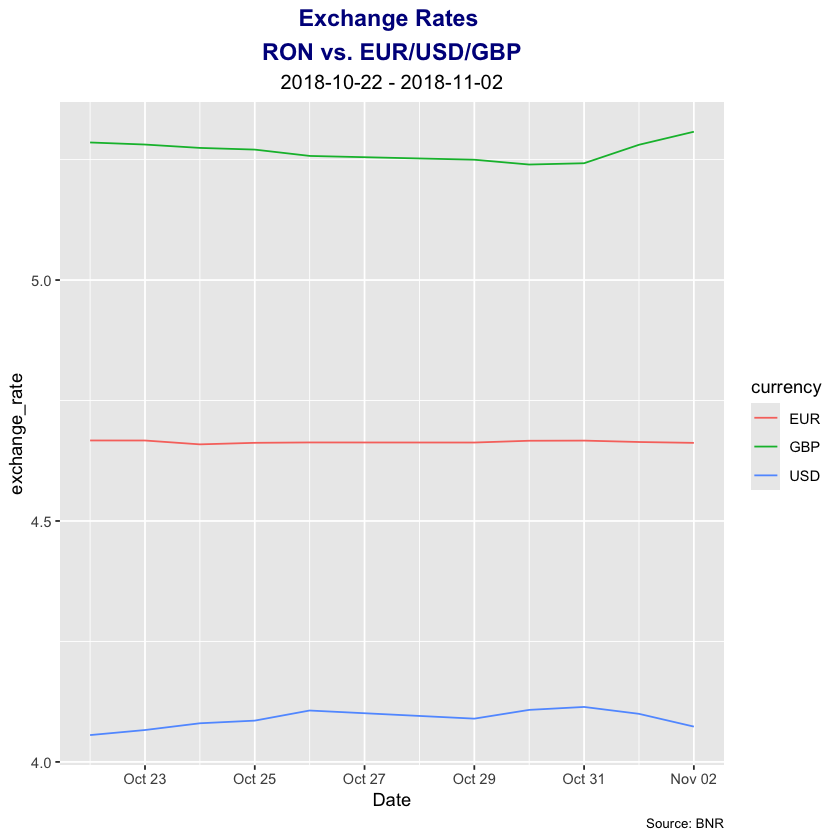

In [61]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) + 
  # `geom` for a line plot
  geom_line() +                               
  labs(
    title = "Exchange Rates \nRON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - '),
    caption = "Source: BNR"
  ) +
  theme(
    plot.title = element_text(
      color = "darkblue", size = 14, face = "bold", hjust = 0.5, lineheight = 1.2
    ),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    plot.caption = element_text(size = 8, hjust = 1)
  )


**1.4** Axis labels/text

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 5:</b>
  Update the previous chart by adding label for x and y axis. Adjust the x axis ticks: rotate by 45%, make smaller and fully under the plot
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

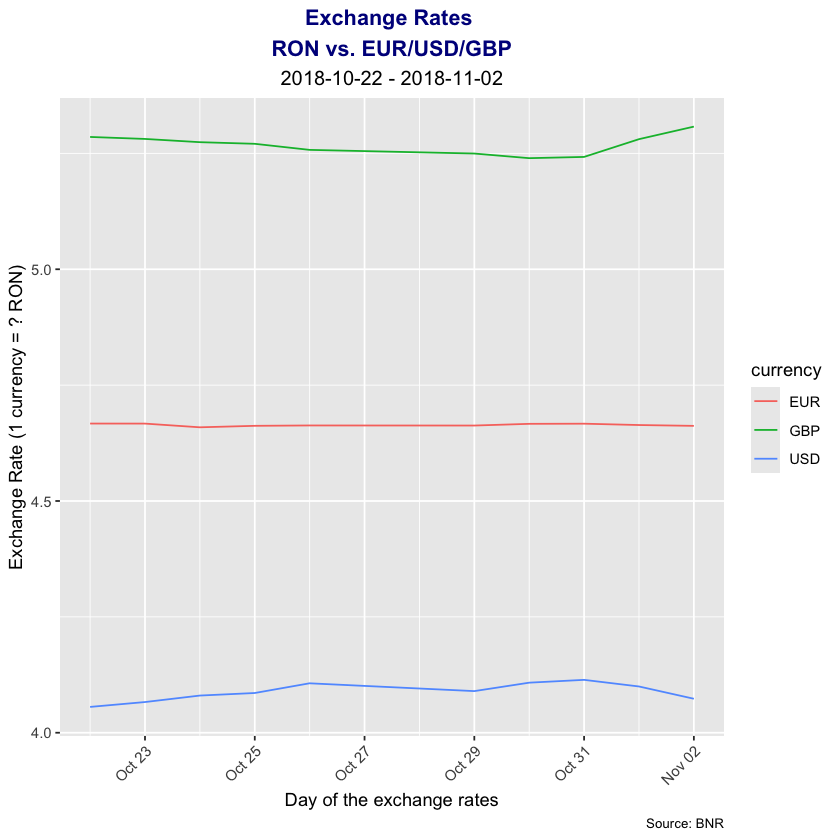

In [172]:
ggplot(
  # the data source
  data,
  # general `aestetics`
  aes (x = Date, y = exchange_rate, color = currency)
  ) + 
  # `geom` for a line plot
  geom_line() +
  labs(
    title = "Exchange Rates \nRON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - '),
    caption = "Source: BNR"
  ) +
  theme(
    plot.title = element_text(
      color = "darkblue", size = 13,face = "bold", hjust = 0.5, lineheight = 1.2),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    plot.caption = element_text(size = 8)
  ) +
  # here we change the laxes labels
  xlab("Day of the exchange rates") +
  ylab("Exchange Rate (1 currency = ? RON)" ) +
  # here we change the angle of text on the x axis (45%)
  theme(
    axis.text.x = element_text(size = 9, angle = 45, hjust=1)
  )

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 6:</b>
  Remove the axis/axes label
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

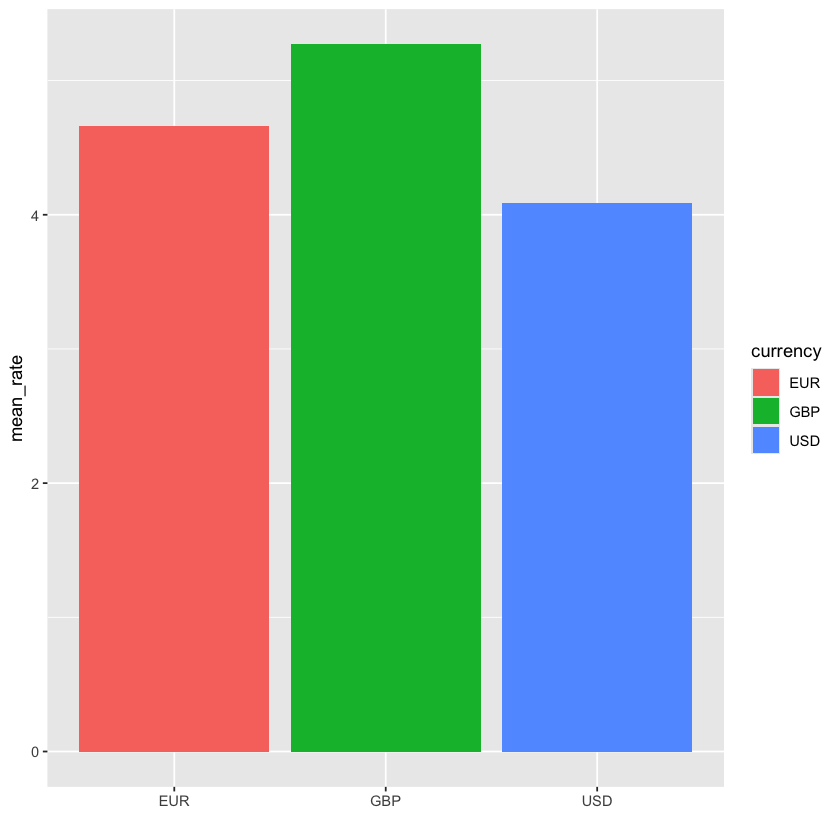

In [68]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_col() +
  xlab("") # this remove the x-axis label/title

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 7:</b>
    Remove the axis/axes text
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

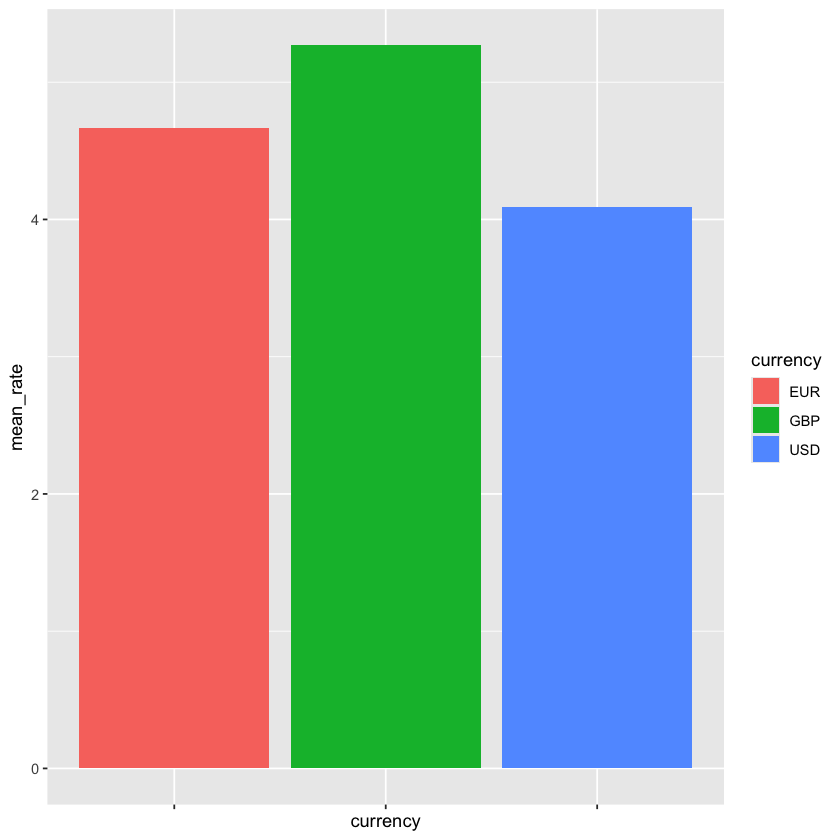

In [69]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)) +
  geom_col() +
  theme(axis.text.x = element_blank())

## 2. Beyond the basics  
**2.1** Chart rotation 

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 8:</b>
    Rotate the plot by 90 degrees
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 1:</div>

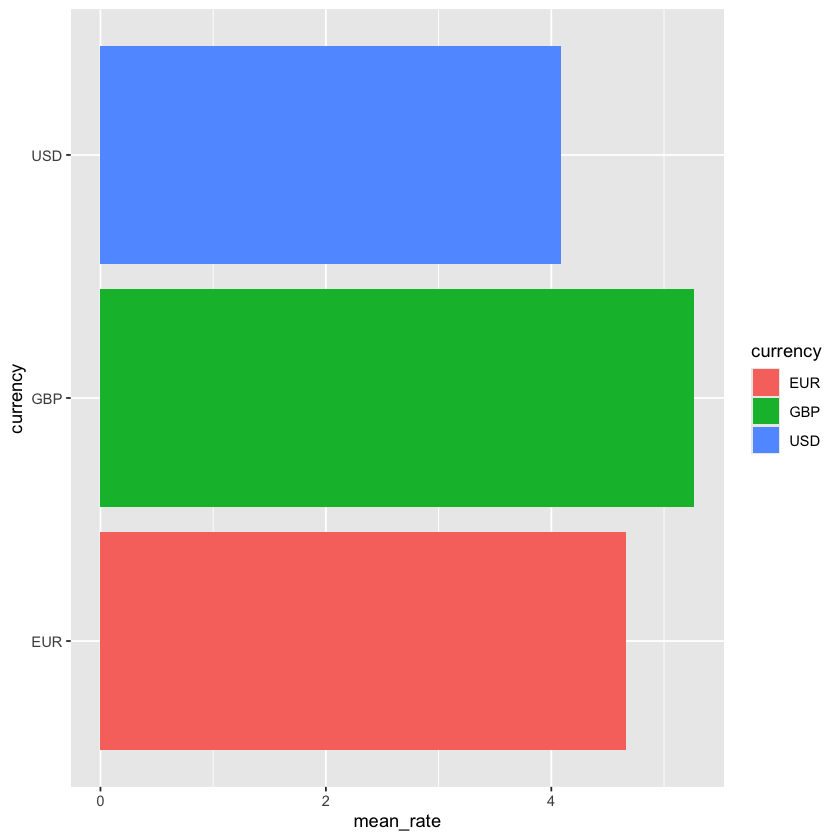

In [174]:
ggplot(
 data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
 aes (x = currency, y = mean_rate, fill = currency)) +
 geom_bar(stat="identity") +
 coord_flip()


<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 2 :) :</div>

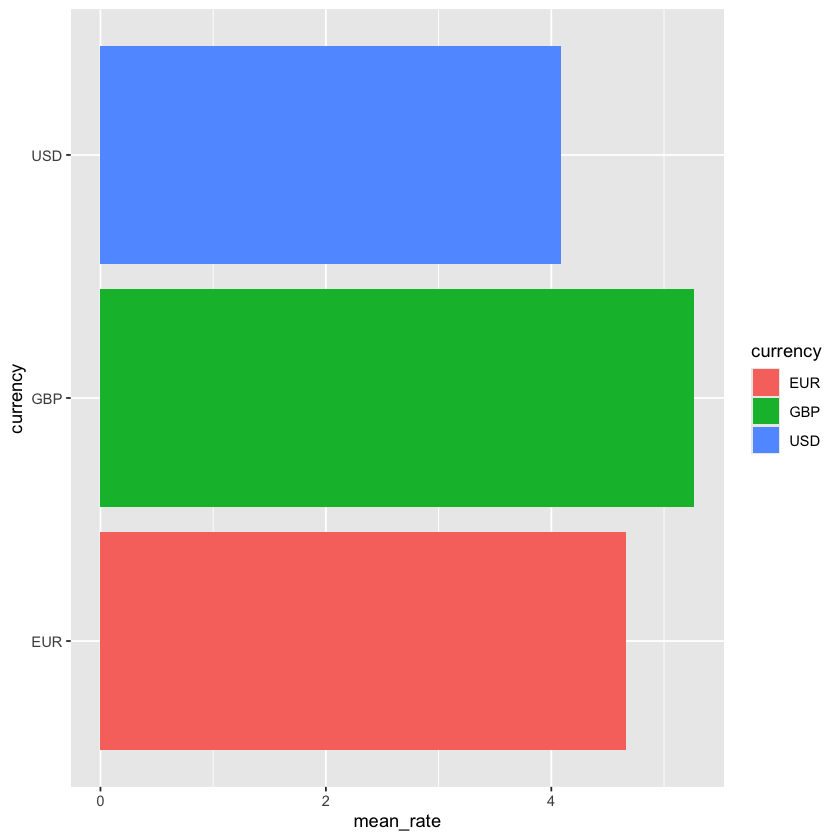

In [175]:
ggplot(
 data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
 aes (x = mean_rate, y = currency, fill = currency)) +
 geom_bar(stat="identity")


**2.2** Text on the plot

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 8:</b>
    Add label text for each bar 
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 1:</div>

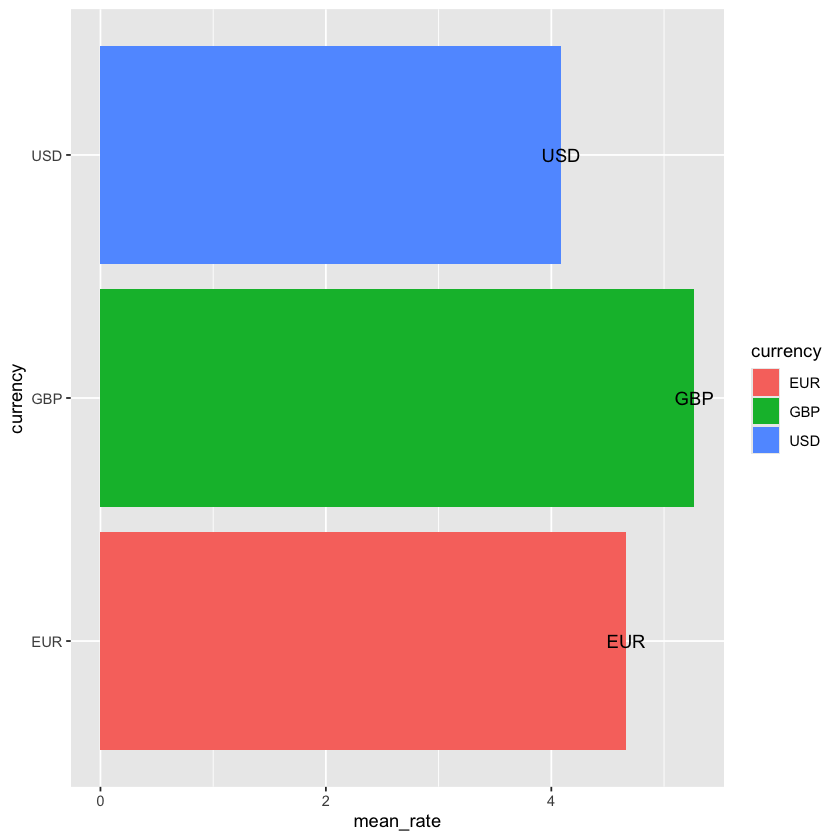

In [73]:
ggplot(
  data %>%
   group_by (currency) %>%
   summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency, label = currency)
  ) +  # `label` will display the text on the chart
  geom_bar(stat="identity") +
  coord_flip() +
  geom_text()

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution 2: use label instead of text</div>

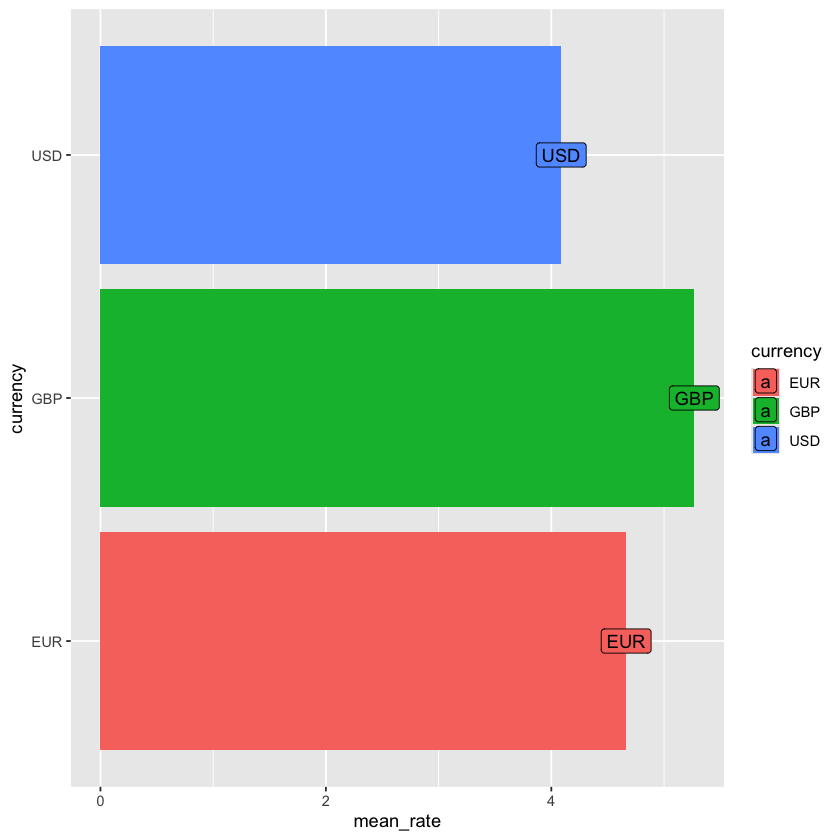

In [74]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency, label = currency)
  ) +  # `label` will display the text on the chart
  geom_bar(stat="identity") +
  coord_flip() +
  geom_label()

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 9:</b>
    Make the text larger and move it inside the bar
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

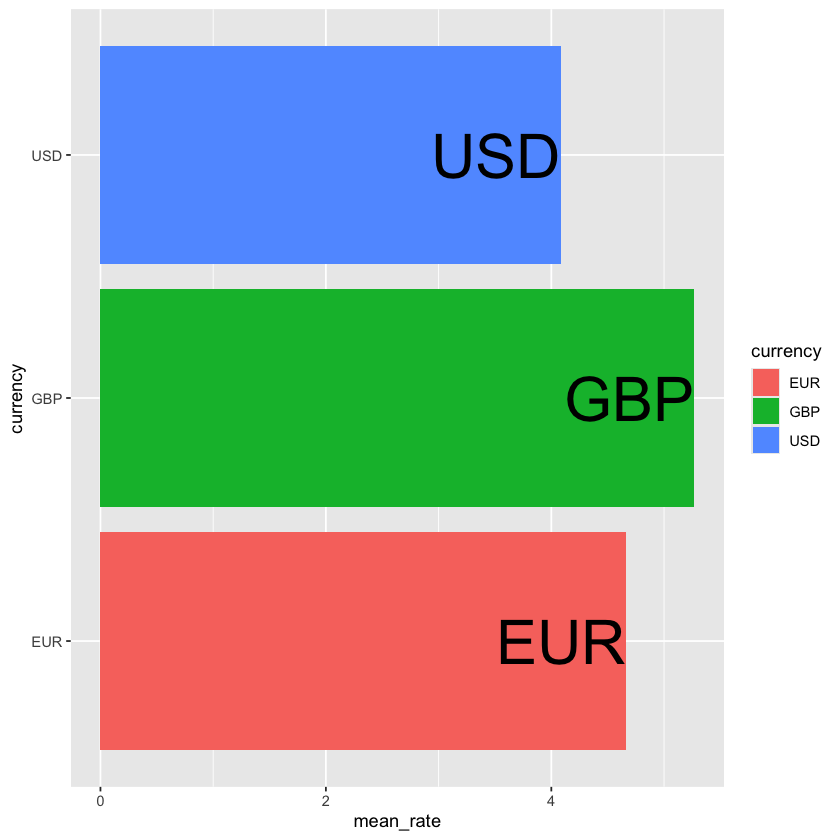

In [179]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  coord_flip() +
  geom_text(aes(label = currency), size = 13, hjust = 1)

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 10:</b>
    Next to text, outside the bar, add the mean value
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

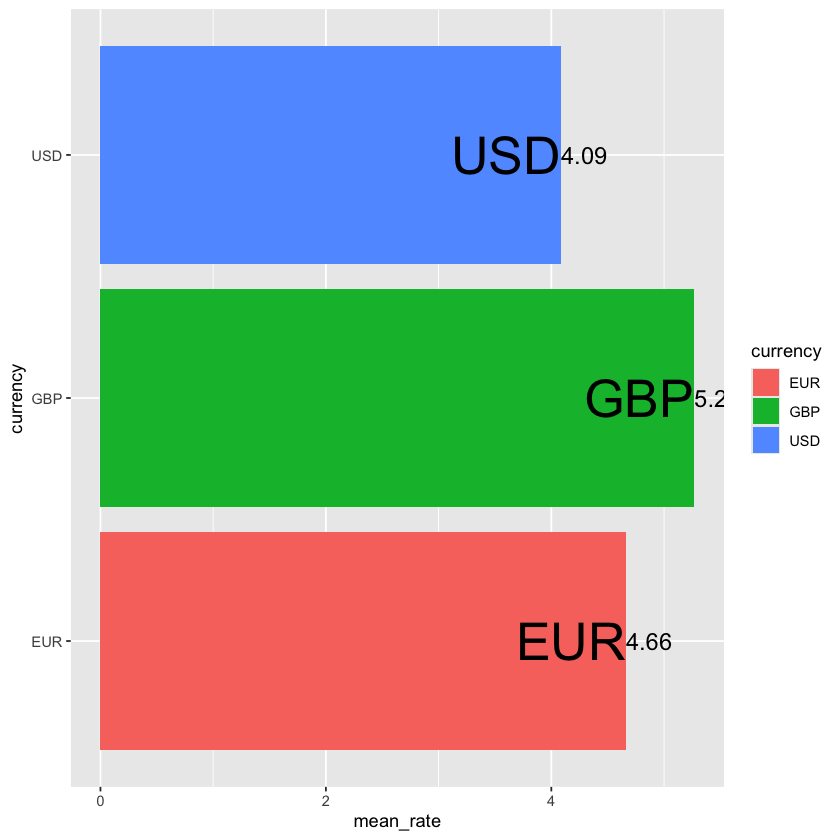

In [181]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  coord_flip() +
  geom_text(aes(label = currency), size = 11, hjust = 1)  +
  geom_text(aes(label = round(mean_rate,2)), size = 5, hjust = 0)

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 11:</b>
    Make the plot vertical, adjust the positioning of the text
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

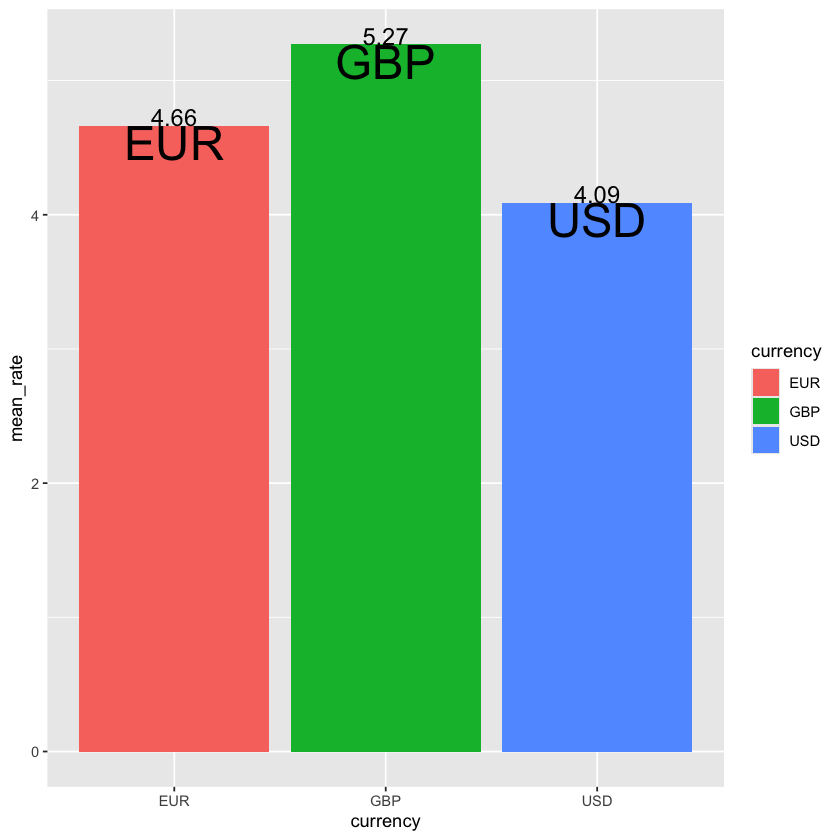

In [182]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  geom_text(aes(label = currency), size = 10, hjust = 0.5, vjust = 1)  +
  geom_text(aes(label = round(mean_rate,2)), size = 5, hjust = 0.5, vjust = 0)

**2.3** Legend

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 12:</b>
   Remove the legend
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

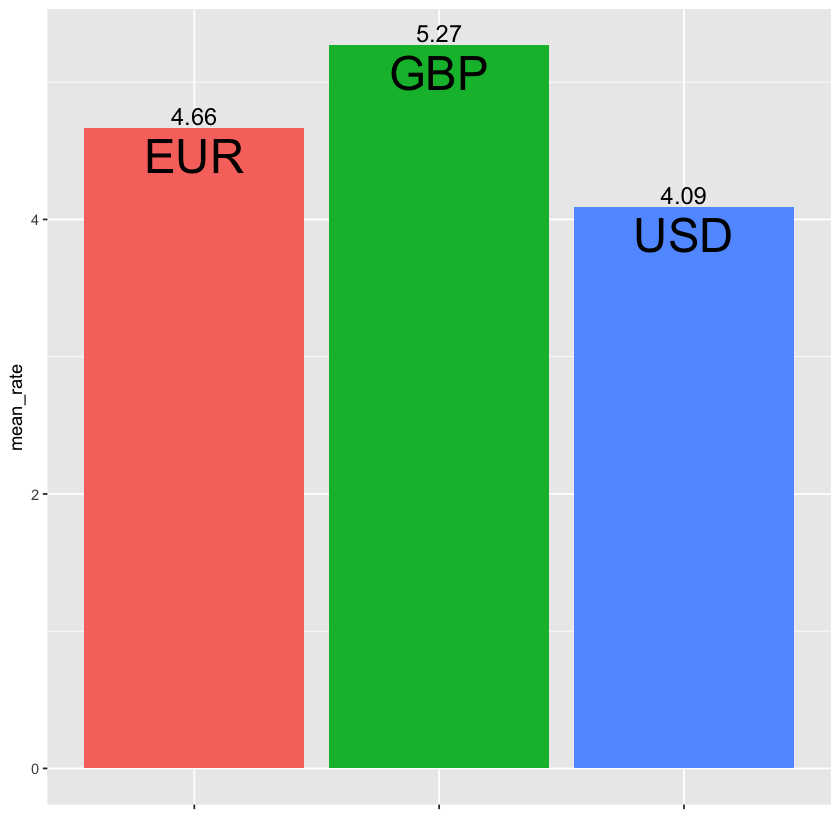

In [84]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  geom_text(aes(label = currency), size = 10, hjust = 0.5, vjust = 1.3)  +
  geom_text(aes(label = round(mean_rate,2)), size = 5, hjust = 0.5, vjust = -0.2)  +
  theme(axis.text.x = element_blank()) + # this will remove the text on the x-axis
  xlab("") + # this will remove x-axis label/title
  theme(legend.position="none")  # this will remove the legend


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 13:</b>
    Change the legend title and position
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

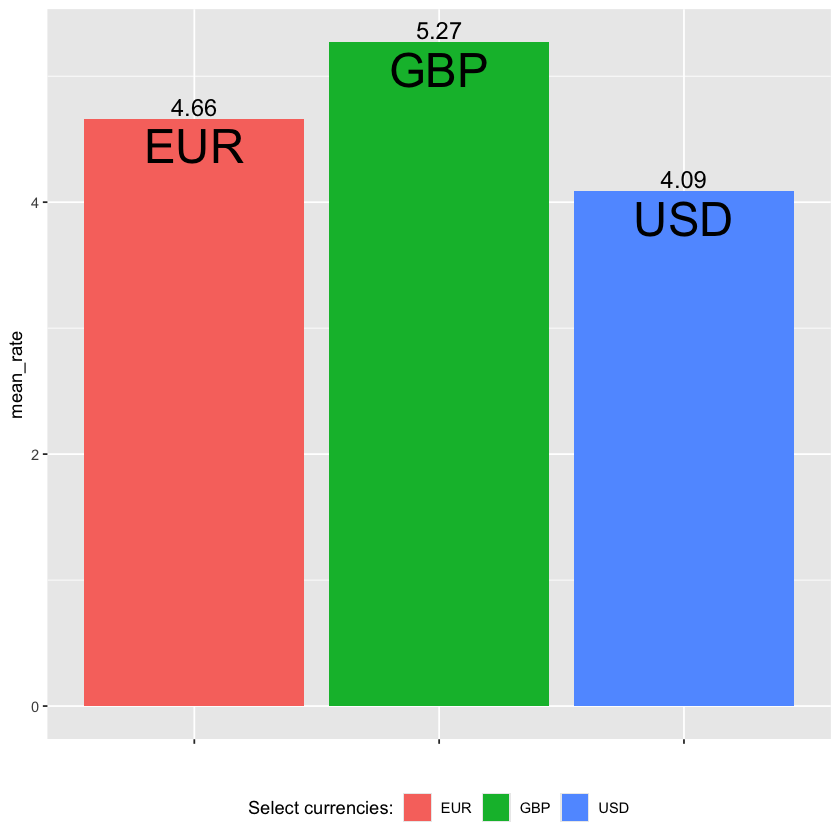

In [151]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  geom_text(aes(label = currency), size = 10, hjust = 0.5, vjust = 1.3)  +
  geom_text(aes(label = round(mean_rate,2)), size = 5, hjust = 0.5, vjust = -0.2)  +
  theme(axis.text.x = element_blank()) + # this will remove the text on the x-axis
  xlab("") + # this will remove x-axis label/title
  labs(fill = 'Select currencies:') + # this will change the legend title
  theme(legend.position="bottom")  # this will change the legend position

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 14:</b>
   Remove the legend title (and keep the legend)
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

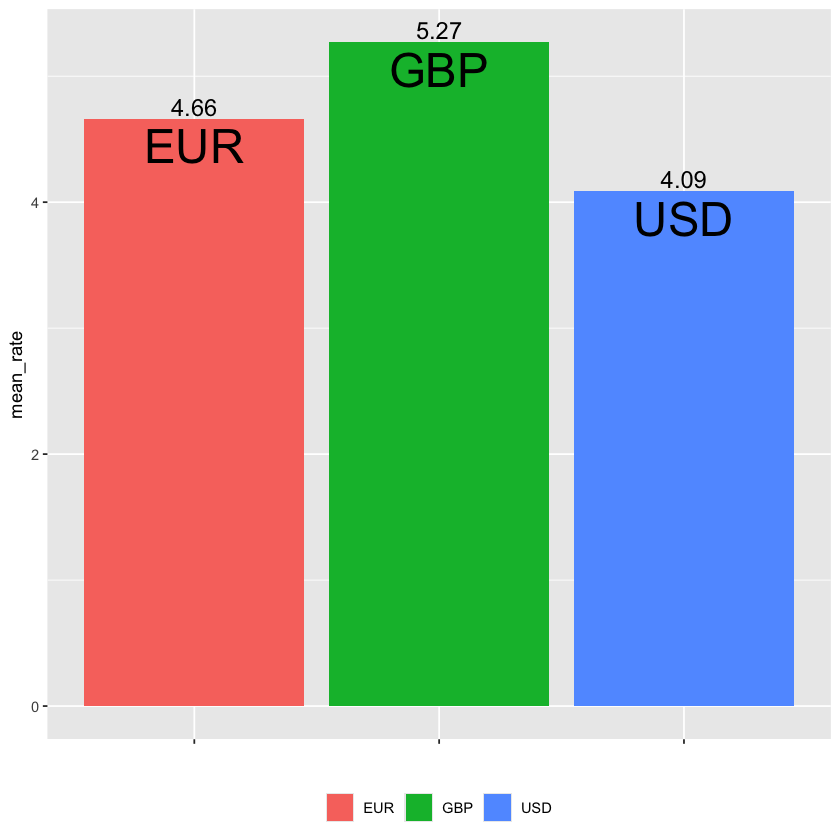

In [86]:
ggplot(
  data %>%
    group_by (currency) %>%
    summarise (mean_rate = mean(exchange_rate)),
  aes (x = currency, y = mean_rate, fill = currency)
  ) +
  geom_bar(stat="identity") +
  geom_text(aes(label = currency), size = 10,hjust = 0.5, vjust = 1.3)  +
  geom_text(aes(label = round(mean_rate,2)), size = 5, hjust = 0.5, vjust = -0.2)  +
  theme(axis.text.x = element_blank()) + # this will remove the text on the x-axis
  xlab("") + # this will remove x-axis label/title
  theme(legend.position="bottom") + # this will change the legend position
  theme(legend.title=element_blank()) # this will remove the legend title

**2.4** Facetting


<!-- Comments Section -->
<div style="background-color:#3498DB; color:white; padding:10px; border-radius:5px; font-size:16px; margin-top:20px;">
  <span style="font-size:20px; margin-right:10px;">💬</span>
  We already implemented this plot
</div>

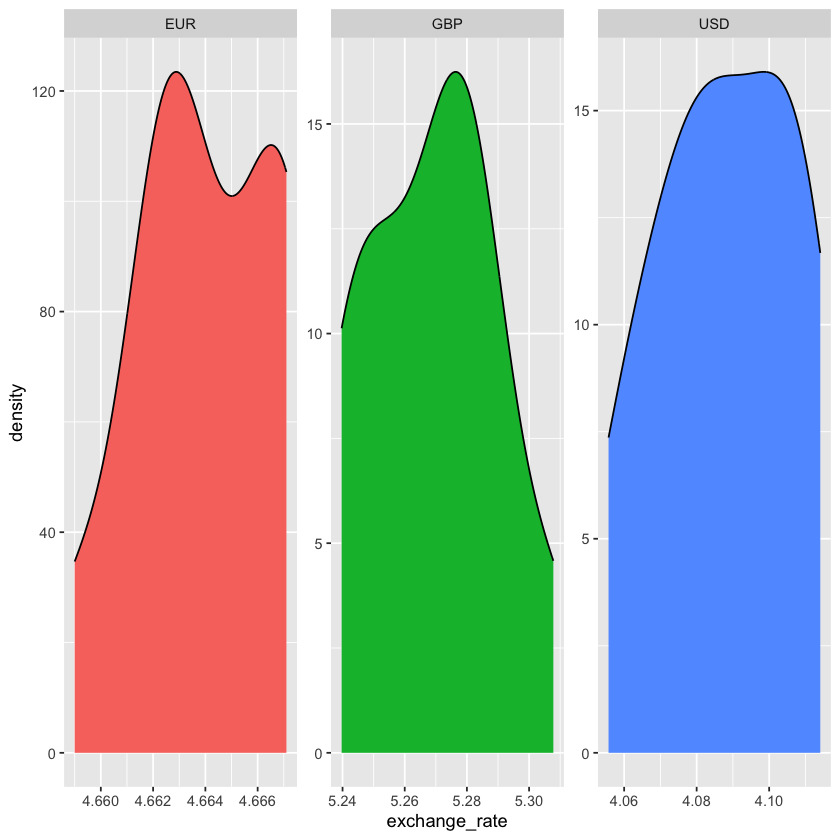

In [87]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_density()   +
  facet_wrap( ~ currency, scales = "free") +
  theme(legend.position="none")  # this will remove the legend

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 15:</b>
   Change the size of the title panes
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

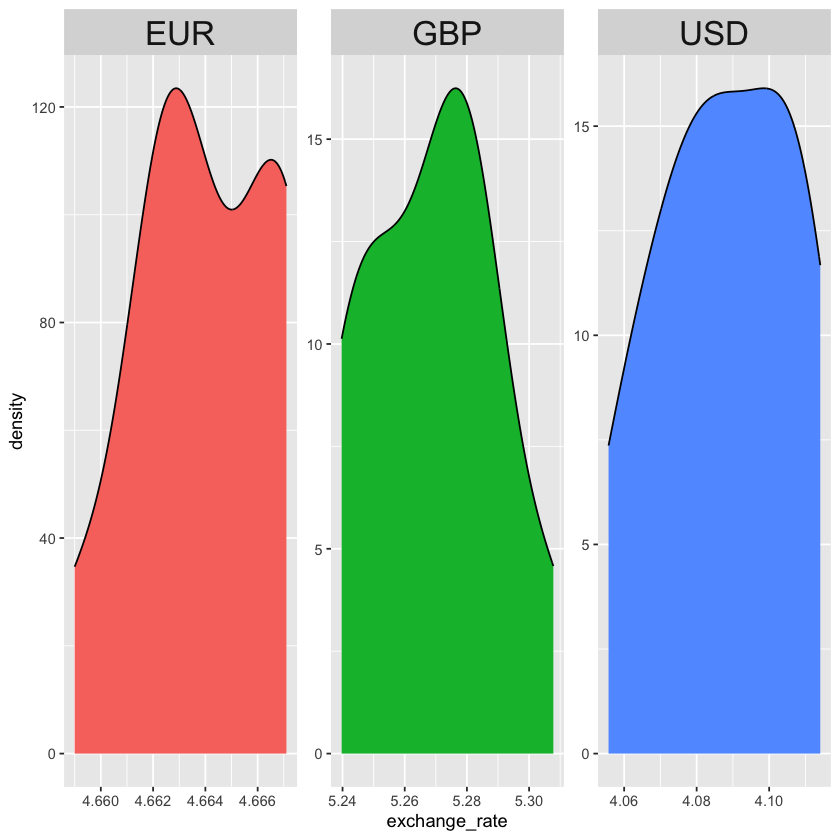

In [89]:
ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_density()   +
  facet_wrap( ~ currency, scales = "free") +
  theme(legend.position="none") + # this will remove the legend
  theme(strip.text = element_text(size = 20) )

In [183]:
load(file.path(data_path, 'net_earning.RData'))
glimpse(net_earning)
head(net_earning)
names(net_earning)[1] <- 'Year'

data_earning <- net_earning %>%
     pivot_longer(-Year, names_to = 'month', values_to = "net_earning") %>%
     mutate (
       net_earning = map_chr(.x = .$net_earning, ~ str_remove_all(.x, '\\.') )
     ) %>%
     mutate(
       net_earning = if_else(
         Year <= 2004, 
         as.numeric(net_earning) / 10000, 
         as.numeric(net_earning)
       )
     ) %>%
     group_by(Year) %>%
     mutate (
       new_month = paste0(
          str_pad(row_number(), width = 2, side = 'left', pad = '0'),
          '-',
          month
        )
     ) %>%
     ungroup()

glimpse(data_earning)

Rows: 28
Columns: 13
$ Year       <chr> "1991", "1992", "1993", "1994", "1995", "1996", "1997", "19…
$ Ianuarie   <chr> "4.038", "13.005", "27.763", "101.795", "170.885", "256.563…
$ Februarie  <chr> "3.978", "12.717", "29.162", "106.378", "173.758", "248.880…
$ Martie     <chr> "4.110", "15.287", "37.146", "112.603", "182.803", "262.237…
$ Aprilie    <chr> "6.213", "15.677", "38.319", "126.194", "199.030", "301.558…
$ Mai        <chr> "7.550", "17.709", "51.034", "126.464", "199.702", "293.508…
$ Iunie      <chr> "7.787", "19.426", "58.917", "131.134", "205.080", "294.148…
$ Iulie      <chr> "8.263", "19.989", "67.047", "142.657", "218.535", "333.797…
$ August     <chr> "8.239", "19.804", "75.032", "153.883", "230.338", "343.090…
$ Septembrie <chr> "9.174", "23.306", "74.723", "153.486", "229.543", "341.361…
$ Octombrie  <chr> "9.824", "24.080", "79.732", "160.483", "242.612", "374.633…
$ Noiembrie  <chr> "10.773", "28.456", "93.020", "167.745", "252.217", "380.37…
$ Decembrie  <chr> 

,Year,Ianuarie,Februarie,Martie,Aprilie,Mai,Iunie,Iulie,August,Septembrie,Octombrie,Noiembrie,Decembrie
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2,1991,4.038,3.978,4.110,6.213,7.550,7.787,8.263,8.239,9.174,9.824,10.773,11.824
3,1992,13.005,12.717,15.287,15.677,17.709,19.426,19.989,19.804,23.306,24.080,28.456,32.612
4,1993,27.763,29.162,37.146,38.319,51.034,58.917,67.047,75.032,74.723,79.732,93.020,101.331
5,1994,101.795,106.378,112.603,126.194,126.464,131.134,142.657,153.883,153.486,160.483,167.745,198.530
6,1995,170.885,173.758,182.803,199.030,199.702,205.080,218.535,230.338,229.543,242.612,252.217,282.995
7,1996,256.563,248.880,262.237,301.558,293.508,294.148,333.797,343.090,341.361,374.633,380.375,433.692


Rows: 336
Columns: 4
$ Year        <chr> "1991", "1991", "1991", "1991", "1991", "1991", "1991", "1…
$ month       <chr> "Ianuarie", "Februarie", "Martie", "Aprilie", "Mai", "Iuni…
$ net_earning <dbl> 0.4038, 0.3978, 0.4110, 0.6213, 0.7550, 0.7787, 0.8263, 0.…
$ new_month   <chr> "01-Ianuarie", "02-Februarie", "03-Martie", "04-Aprilie", …


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 16:</b>
   Display the neat yearning per year, in each month
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution: with facet_wrap</div>

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_col()`).”


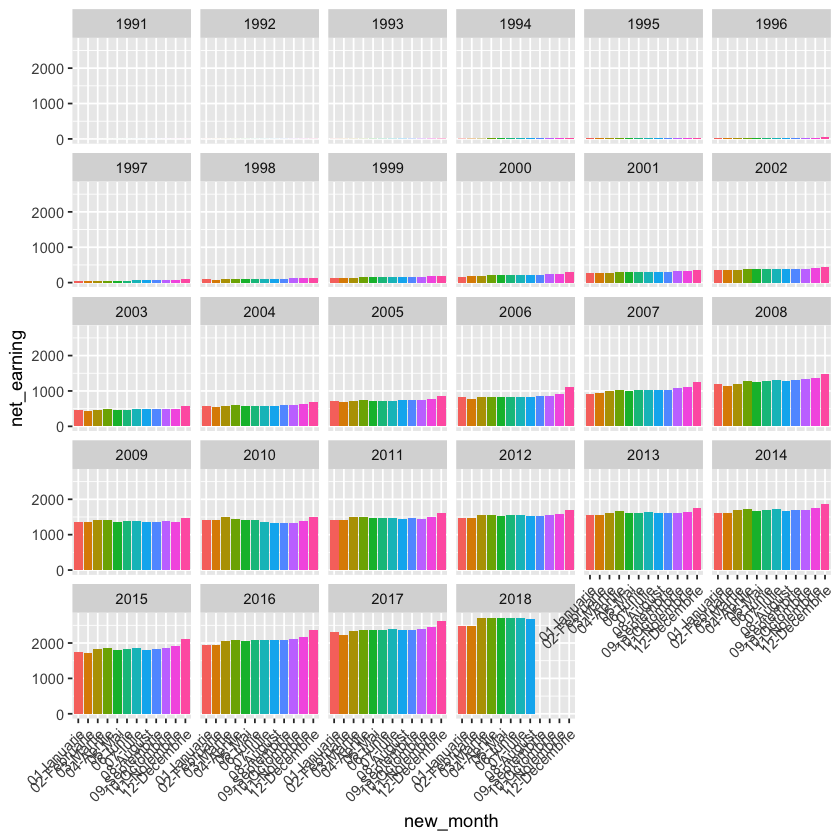

In [97]:
ggplot(
  data_earning,
  aes (x = new_month, y = net_earning, fill = new_month)
  ) +
  geom_col() +
  facet_wrap(~ Year) +
  theme(legend.position="none") + # this will remove the legend
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) #

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution: with facet_grid</div>

Warning message:
“Removed 4 rows containing missing values or values outside the scale range
(`geom_col()`).”


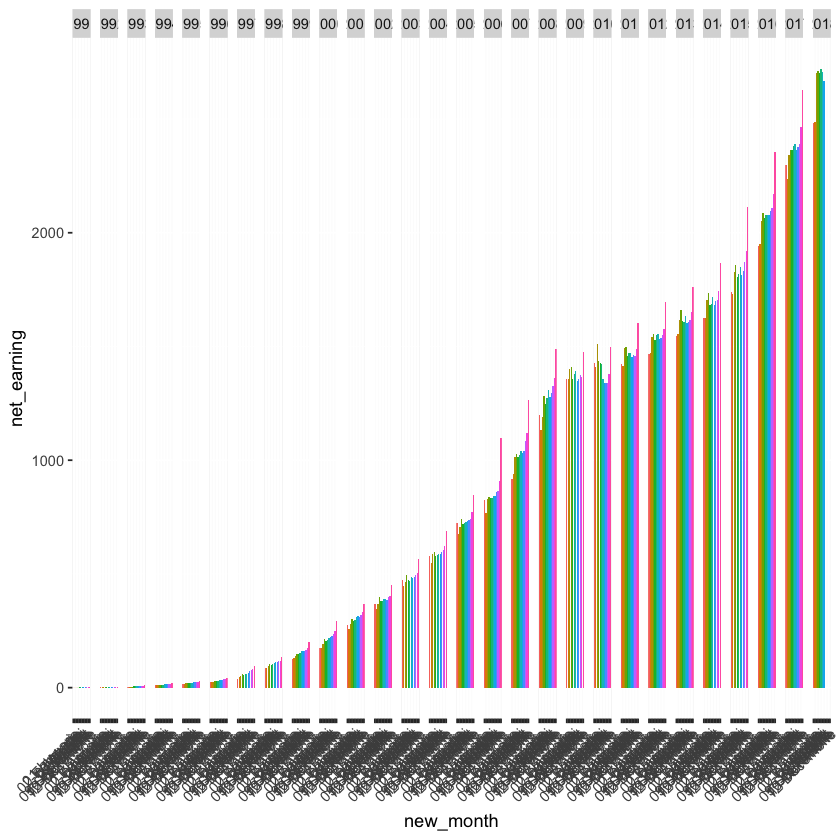

In [99]:
ggplot(
  data_earning,
  aes (x = new_month, y = net_earning, fill = new_month)
  ) +
  geom_col() +
  facet_grid(. ~ Year) +
  theme(legend.position="none") + # this will remove the legend
  theme(axis.text.x = element_text(angle = 45, hjust = 1)) #

## 3. Useful Companions to ggplot2  
- **3.1** `scales` (for better axis formatting)


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 17:</b>
   Using currency dataset and line charts, update the y axis range to be between 4.5 and 6
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

Warning message:
“Removed 10 rows containing missing values or values outside the scale range
(`geom_line()`).”


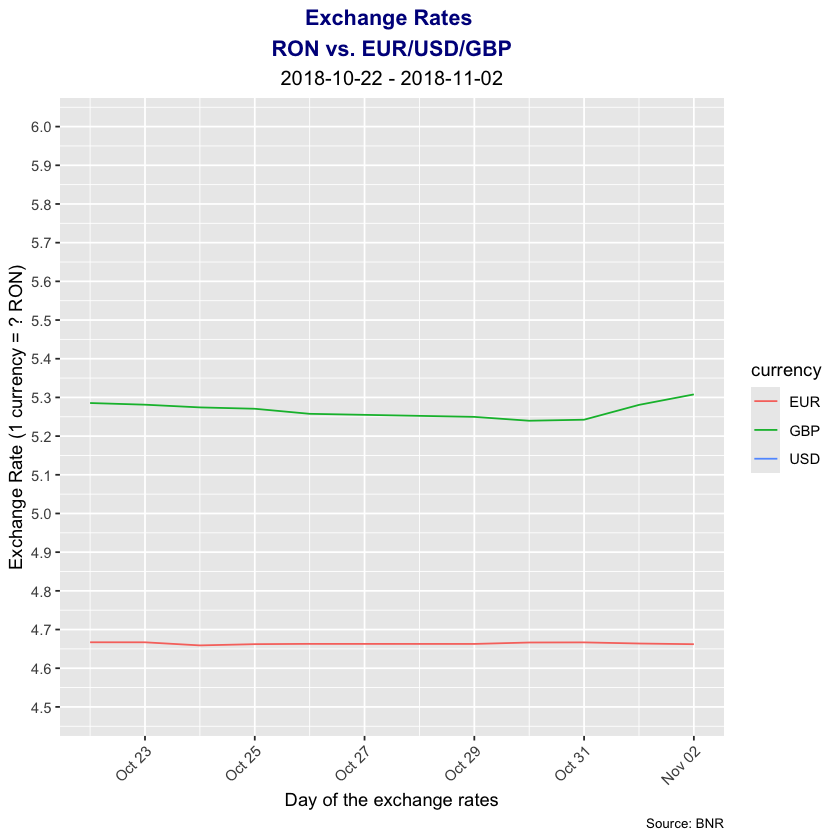

In [98]:
ggplot(
  data,
  aes (x = Date, y = exchange_rate, color = currency)
  ) +
  geom_line() +
  labs(
    title = "Exchange Rates \nRON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - '),
    caption = "Source: BNR") +
  theme(
    plot.title = element_text(
      color = "darkblue", size = 13,face = "bold", hjust = 0.5, lineheight = 1.2),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    plot.caption = element_text(size = 8)
  ) +
  # here we change the laxes labels
  xlab("Day of the exchange rates") +
  ylab("Exchange Rate (1 currency = ? RON)" ) +
  # here we change the angle of text on the x axis (45%)
  theme(axis.text.x = element_text(size = 9, angle = 45, hjust = 1)) +
  scale_y_continuous(limits = c(4.5,6), breaks = seq(4.5, 6, 0.1))


## 4. Saving Charts  
- Exporting and formatting your plots for presentations & reports  

<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 18:</b>
   Store and individual plot
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

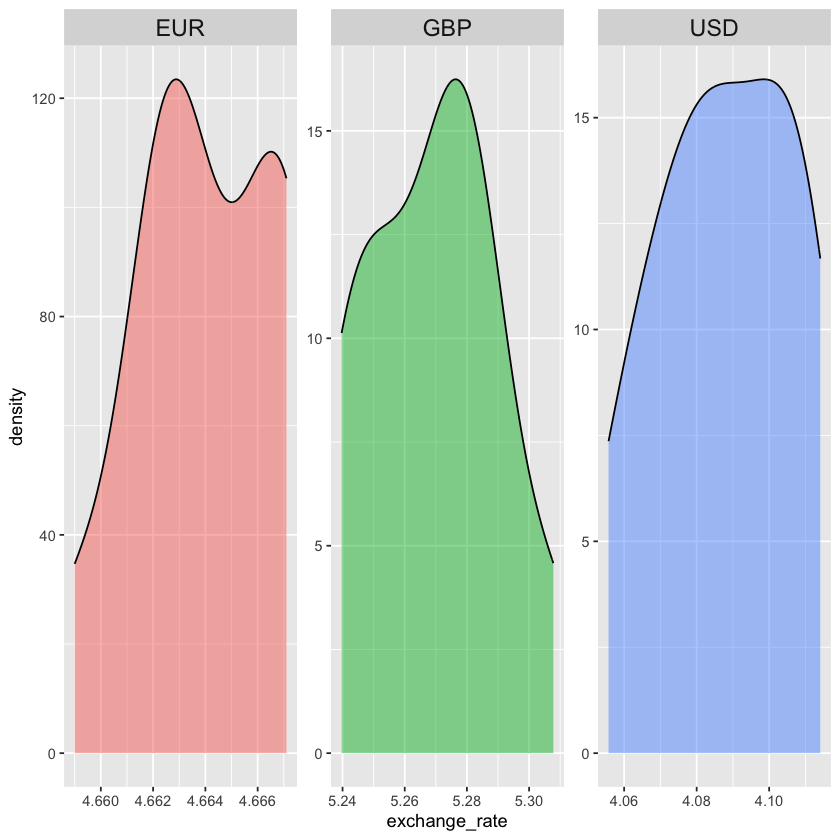

In [112]:
p1 = ggplot(
  data,
  aes (x = exchange_rate, fill = currency)
  ) +
  geom_density(alpha = 0.5)   +
  facet_wrap( ~ currency, scales = "free") +
  theme(legend.position="none") + # this will remove the legend
  theme(strip.text = element_text(size = 14) )
p1

In [104]:
ggsave("p1.pdf", plot = p1, device = "pdf")

Saving 7 x 7 in image


<!-- Task Section -->
<div style="background-color:#E67E22; color:white; padding:10px; border-radius:5px; font-size:16px;">
  <span style="font-size:20px; margin-right:10px;">✏️</span><b>Task 19:</b>
   Store a combined plot of 2 plots
</div>

<!-- Task Section -->
<div style="background-color:#2ECC71; color:white; padding:10px; border-radius:5px; font-size:16px; display:flex; align-items:center;">Solution:</div>

In [113]:
p2 = ggplot(
  data,
  aes (x = Date, y = exchange_rate,color = currency)
  ) +
  geom_line() +
  labs(
    title = "Exchange Rates \nRON vs. EUR/USD/GBP",
    subtitle = paste(min(data$Date), max(data$Date), sep = ' - '),
    caption = "Source: BNR"
  ) +
  theme(
    plot.title = element_text(
      color = "darkblue", size = 13,face = "bold", hjust = 0.5, lineheight = 1.2
    ),
    plot.subtitle = element_text(size = 12, hjust = 0.5),
    plot.caption = element_text(size = 8)
  ) +
  xlab("Day of the exchange rates") +
  ylab("Exchange Rate (1 currency = ? RON)" ) +
  # here we change the angle of text on the x axis (45%)
  theme(axis.text.x = element_text(size = 9, angle = 45, hjust = 1)) +
  scale_y_continuous(limits = c(4,6), breaks = seq(4, 6, 0.1))

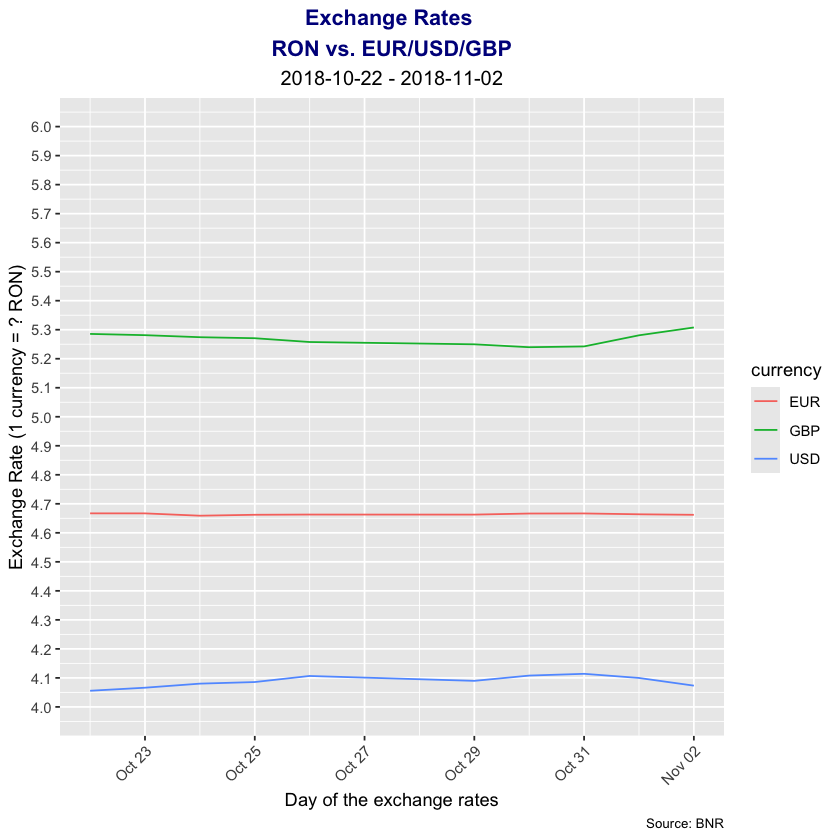

In [114]:
p2

In [116]:
library(patchwork)
p1_2 = p1 + p2 + plot_layout(nrow = 1, byrow = FALSE)

In [117]:
ggsave("p1_2.pdf", plot = p1_2,  device = "pdf") 
ggsave("p1_2.png", plot = p1_2,  device = "png") 
ggsave("p1_2.tiff", plot = p1_2,  device = "tiff") 

Saving 7 x 7 in image
Saving 7 x 7 in image
Saving 7 x 7 in image


#### **ggplot2** tips & tricks

![](../misc/ggplot2_cheat_sheet-1.png)